<a href="https://colab.research.google.com/github/TanTruong24/CS114.L21-Machine-Learning/blob/main/Big-Assignment/FaceMask_Classification_MobileNetV2/MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> <b> CS114.L21: MACHINE LEARNING <center> <h1> <b>

<center> <h2> <b> ĐỒ ÁN CUỐI KỲ: PHÂN LOẠI MANG KHẨU TRANG SỬ DỤNG MOBILENETV2 <center> <h> <b>

#**I. GIỚI THIỆU**



##**1. Giảng viên hướng dẫn**
1. Thầy Nguyễn Đình Duy
2. Thầy Phạm Nguyễn Trường An

##**2. Thành viên nhóm**

* 19522246 - Vũ Nguyễn Nhật Thanh
* 19522180 - Trương Thế Tấn
* 19521551 - Nông Thanh Hồng

##**3. Lý do chọn đề tài**

Năm 2020, 2021 thế giới nói chung và Việt Nam nói riêng đã có nhiều thay đổi khi đối mặt với dịch bệnh Covid - 19.  Theo số liệu từ [Tổ chức Y tế Thế giới - WHO](https://covid19.who.int/), tính đến 5:55pm CEST, 13-7-2021 *(Theo giờ Châu Âu)*, tức là vào 20:55 ngày 13-7-2021 ở Việt Nam thì tổng số ca nhiềm Covid-19 trên thế giới đạt mốc là 187,086,096 ca, trong đó có 4,042,921 ca tử vong. Trong khi ở Việt Nam tính tới 12:00 trưa ngày 14-7-2021 là đã có tổng 30,477 ca nhiễm, đang điều trị 21,823 ca, khỏi 8,520 ca; tử vong 130 ca (theo số liệu [bộ Y tế](https://ncov.moh.gov.vn/))*. 

Thời gian gần đây *(cụ thể tính từ 27-4-2021)* Việt Nam có số ca nhiễm tăng vọt, với những điểm nóng là Bắc Giang *(đã giải quyết)* và kỉ lục trong những ngày của tháng bảy đang thuộc với Tp. Hồ Chí Minh với số ca nhiễm tăng nhanh và diễn biến khó lường *(trong ngày 12/7 số ca nhiễm hơn 1,700 ca)*. Không chỉ có Việt Nam, các quốc gia trên thế giới cũng đang đối mặt với việc bùng phát dịch mới như:  Brazil (48,503 ca),Ấn Độ (37,154 ca), Indonesia (40,423 ca), Anh (31,352 ca), Mỹ (8,224 ca),... *(số ca nhiễm mới trong vòng 24h theo số liệu từ [WHO](https://covid19.who.int/) ngày 13/7 ở Việt Nam)*.

Với sự nhất quán trong việc thực hiện những quy định đã được đề ra ban đầu, cộng với đó là thông điệp 5K và phương châm mới "5K + vắc xin" Việt Nam tự tin có thể vượt qua đợt dịch lần này. Bên cạnh đó, sẽ hiệu quả, nhanh chóng trong công tác kiểm soát dịch bệnh nếu mỗi người dân thực hiện, chấp hành nghiêm chỉnh biện pháp 5K, trong đó, việc bắt buộc mang khẩu trang là một trong những điều tiên quyết mà người dân cần thực hiện.

Tuy nhiên, việc mang khẩu trang sẽ không có tác dụng nếu như chúng ta mang sai cách. Để đảm bảo việc thực hiện đúng quy định mang khẩu trang và mang một cách hiệu quả thì nhóm em hướng tới tận dụng sự phát triển của Machine Learning trong việc nhận diện người không mang khẩu trang hoặc mang khẩu trang sai cách. Mô hình sẽ được ứng dụng ở các tòa nhà, cửa hàng,... nơi có nhiều người ra vào. Thông qua việc đặt camera (hoặc tận dụng nếu phù hợp) trước các cửa ra vào, mô hình sẽ cảnh báo được người đang không mang hoặc mang khẩu trang sai cách. Góp phần giúp họ điều chỉnh, thực hiện tốt quy định, đồng thời giúp các nhân viên an ninh kiểm soát tốt việc thực hiện đúng quy định. 

#**II. TÌM HIỂU VỀ MobileNetV2**

##**1. Nhu cầu về Lightweight model**

Với sự phát triển về công nghệ, cụ thể là Học sâu *(Deep learning)* hay Thị giác máy tính *(computer vision)* đã tạo ra rất nhiều ứng dụng được xây dựng từ các model khác nhau với độ chính xác ngày càng được cải thiện. Tuy nhiên, không phải thiết bị nào cũng trang bị những tài nguyên tính toán mạnh mẽ, cũng như nhu cầu đưa những model này lên trên những thiết bị gặp hạn chế về tài nguyên tính toán. Để phát triển được những ứng dụng như *Trí tuệ nhân tạo* (AI) trên các thiết bị như mobile, IoT thì chúng ta cần những mô hình phù hợp với tài nguyên hạn chế trên những thiết bị này. 

Những model được ưa chuộng được sử dụng thường là những model có số lượng tính toán ít và độ chính xác cao. MobileNet là một trong những số những model như vậy.

##**2. MobileNet và MobileNetV2**

###**2.1. MobileNet** 
Được phát triển bởi đội ngũ Google, mô hình sử dụng cách tính chập tích mang tên **DSC** *(Depthwise Separable Convolution)* nhằm giảm kích thước mô hình và giảm độ phức tạp tính toán. Do đó, MobileNet thường được sử dụng cho các ứng dụng Computer Vision trên các thiết bị nhỏ gọn như điện thoại thông minh hay thiết bị nhúng.
- **Depthwise Separable Convolution:** Ý tưởng của Depthwise Separable Convolution là chia phép convolution làm 2 phần: *Depthwise convolution*  và *Pointwise convolution*.
  - *Depthwise convolution* (Tích chập chiều sâu): Chúng ta sẽ chia khối input tensor3D thành những lát cắt ma trận theo độ sâu. Thực hiện tích chập trên từng lát cắt như hình minh họa bên dưới.
  ![Depthwise](https://drive.google.com/uc?export=view&id=1J-MQSs8HQ7xOgAzqAQGKVm7BVMfd2qAz)
    Mỗi một channel sẽ áp dụng một bộ lọc khác nhau và hoàn toàn không chia sẻ tham số. Điều này có ba tác dụng chính cho mô hình:

    - Nhận diện đặc trưng: Quá trình học và nhận diện đặc trưng sẽ được tách biệt theo từng bộ lọc. Nếu đặc trưng trên các channels là khác xa nhau thì sử dụng các bộ lọc riêng cho channel sẽ chuyên biệt hơn trong việc phát hiện các đặc trưng. Chẳng hạn như đầu vào là ba kênh RGB thì mỗi kênh áp dụng một bộ lọc khác nhau chuyên biệt.

    - Giảm thiểu khối lượng tính toán

    - Giảm thiếu số lượng tham số

  - *Pointwise convolution* (Tích chập điểm): Có tác dụng thay đổi độ sâu của output bước trên. Như vậy kích thước width và height không thay đổi mà chỉ độ sâu thay đổi.
  ![Pointwise ](https://drive.google.com/uc?export=view&id=1LF6Y4ujgY_MDw9t3MCSM10P49c3YE3Ux)



###**2.2. MobileNetV2** 
Là một trong những kiến trúc được ưa chuộng nhất khi phát triển các ứng dụng AI trong computer vision. Rất nhiều các kiến trúc sử dụng *backbone* (xương sống) là MobileNetV2 như *SSDLite* trong object detection và *DeepLabV3* trong image segmentation.
  - *DeepLabv3+*: Được cung cấp bởi Google vào năm 2016, là một mô hình học sâu cho *semantic image segmentation* (phân đoạn hình ảnh ngữ nghĩa), trong đó mục tiêu là gán các nhãn ngữ nghĩa (chẳng hạn như một người, một con chó, một con mèo, v.v.) cho mỗi pixel trong hình ảnh đầu vào.  DeepLabV3+ hỗ trợ các nền tảng mạng sau: MobileNetv2, ResNet,...
  - *SSDLite:* là một mô hình phát hiện đối tượng nhằm mục đích tạo ra các đường viền giới hạn xung quanh các đối tượng trong một hình ảnh. SSDLite sử dụng MobileNet để trích xuất tính năng nhằm cho phép phát hiện đối tượng theo thời gian thực trên thiết bị di động.



##**3. Module: tf.keras.applications**

Trong phần này, nhóm em sử dụng ứng dụng Keras với kiến ​​trúc MobileNetV2 với các trọng số được đào tạo trước. 
***tf.keras.applications.mobilenet_v2.MobileNetV2***



In [ ]:
tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=None, alpha=1.0, include_top=True, weights='imagenet',
    input_tensor=None, pooling=None, classes=1000,
    classifier_activation='softmax', **kwargs
)

- Hàm này trả về một mô hình phân loại ảnh Keras, được tải tùy chọn với các trọng số được đào tạo trước trên ImageNet.
- Trong đó, các args:

  - ***input_shape:*** tùy chọn shape nếu bạn muốn sử dụng một model có độ phân giải hình ảnh đầu vào không phải là (224, 224, 3). Tùy chọn phải có chính xác 3 inputs channels (224, 224, 3). Bạn cũng có thể bỏ qua tùy chọn này nếu bạn muốn suy ra *input_shape* từ *input_tensor*. Nếu bạn chọn bao gồm cả input_tensor và input_shape thì input_shape sẽ được sử dụng nếu chúng khớp, nếu các hình dạng không khớp thì chúng tôi sẽ đưa ra lỗi.

  - ***alpha:***
    - Nếu alpha < 1.0, giảm số lượng bộ lọc trong mỗi lớp theo tỷ lệ.
    - Nếu alpha > 1.0, tăng số lượng bộ lọc trong mỗi lớp theo tỷ lệ.
    - Nếu alpha = 1, số bộ lọc mặc định từ giấy được sử dụng ở mỗi lớp.

  - ***include_top:*** 	Boolean, có bao gồm lớp được kết nối đầy đủ ở đầu mạng hay không. Mặc định là *True*.

  - ***weights:*** Chuỗi
    - *None*: khởi tạo ngẫu nhiên
    - *'imagenet'* Đào tạo trước trên ImageNet hoặc đường dẫn đến tệp trọng số sẽ được tải.

  - ***input_tensor:*** tùy chọn Keras tensor (tức là đầu ra của layers.Input()) để sử dụng như đầu vào hình ảnh cho mô hình.

  - ***pooling:*** Chế độ tổng hợp tùy chọn khi *include_top* là *False*
    - *None*: có nghĩa là đầu ra của mô hình sẽ là đầu ra tensor 4D của khối tích chập cuối cùng.
    - *avg*: có nghĩa là global average pooling sẽ được áp dụng cho đầu ra của khối tích chập cuối cùng và do đó đầu ra của mô hình sẽ là tensor 2D.
    - *max*: có nghĩa là global max pooling sẽ được áp dụng.

  - ***classes:*** Số nguyên, số lớp tùy chọn để phân loại hình ảnh thành, chỉ được chỉ định nếu *include_top =  True* và nếu không có đối số *weights* nào được chỉ định

  - ***classifier_activation:*** Một chuỗi hoặc có thể gọi. Chức năng kích hoạt để sử dụng trên lớp "trên cùng". Bỏ qua trừ khi *include_top = True*. Đặt *classifier_activation = None* có để trả về logits của lớp "trên cùng". Khi tải các *pretrained weights* (trọng số được đào tạo trước), *classifier_activation* chỉ có thể là *None* có hoặc "*softmax*".
  
  - ***kwargs:*


#**III. MÔ TẢ BÀI TOÁN VÀ BỘ DỮ LIỆU**

##**1. input, output**

Nhóm em sử dụng mô hình caffe được xây dựng sẵn để nhận diên ra các khuôn mặt, các khuôn mặt đó sẽ được đưa vào mô hình phân loại mà nhóm em xây dựng và dự đoán là khuôn mặt đó đang đeo khẩu trang đúng cách, đeo khẩu trang sai cách hay không đeo khẩu trang.
- input: một tensor có kích thước (224, 224, 3), tensor này ứng với một bức ảnh có kích thước (224, 224) và có 3 kênh màu là Red, Green, Blue.
- output: một mảng số thực có kích thước (1,3) ứng với 3 xác suất, mỗi xác suất đại diện cho khả năng mà bức hình có nhãn thuộc về một lớp.

##**2. Mô tả bộ dữ liệu**

Nhóm em tiến hành xây dựng bộ dữ liệu dựa trên các đặc điểm môi trường mà mô hình có thể gặp trong thực tế ứng với ngữ cảnh mà nhóm em hướng tới, dữ liệu không có sẵn, nên nhóm em tiến hành thu thập dữ liệu từ các bức ảnh lớn, sau đó tiến hành cắt và phân loại nhãn. Các bức ảnh lớn được nhóm thu thập phải có những đặc điểm sau:
  + Điều kiên ánh sáng: ánh sáng mặt trời, các bóng râm, ánh sáng trắng từ các bóng đèn trên trần của toà nhà hoặc từ các bóng đèn treo trước cửa các cửa hàng, không có các ảnh trong bóng tối hay trong các buổi đêm không có đèn.
  + Đặc điểm khuôn mặt: khuôn mặt của các bức hình lớn khi phóng to phải ở mức có thể nhìn ra được, khuôn mặt không bị che bởi các vật khác, khuôn mặt đang hướng về phía camera, đang nhìn thẳng, quay trái, quay phải hoặc hơi cúi.
  + Background của các bức hình lớn là những hình ảnh liên quan đến các khung cảnh có thể gặp ngoài trời như cây cối, con người, mặt đường, tòa nhà, xe cộ.
  + Điều kiện thời tiết: thời tiết trong các bức hình lớn bao gồm những điều kiện thời tiết ngoài trời có thể có như nắng, mưa, có gió.
  + Góc chụp: các bức hình lớn được chụp từ camera có độ cao cách mặt đất từ 2 đến 2.5m, với góc chụp 60 độ khi hợp với phương thẳng đứng.

Các khuôn mặt trong bức hình lớn sẽ được cắt ra thành các khung hình vuông hoặc hình chữ nhật, các khung hình này bao trọn toàn bộ khuôn mặt, các khuôn mặt này sẽ được sử dụng để làm dữ liệu huấn luyện cho mô hình phân loại.

Số lượng: Mô hình có số lớp dự đoán là 3, và mỗi nhãn có 1200 bức ảnh khuôn mặt đã được cắt từ các bức hình lớn, dữ liệu có sự đa dạng như sau:
  + các khuôn mặt trong bức ảnh đang nghiêng đầu, quay đầu sang trái hoặc phải, nhìn về phía trước, nhìn thẳng vào camera
  + các khuôn mặt được chụp trong điều kiện ánh sáng ban ngày ngoài trời hoặc từ các ánh sáng trắng từ các bóng đèn treo trước cửa hàng hay
  + các bóng đèn trên trần nhà, các bức hình được chụp từ camera dưới góc chụp 60 độ kết hợp với phương thẳng đứngđứng. 
  
Tổng số lượng bức hình của cả 3 nhãn là 3600 bức ảnh, nhóm sử dụng thêm phương thức ImageDataGenerator() để tăng thêm số lượng ảnh huấn luyện cho mô hình phân loại.

Các bức ảnh khuôn măth trước khi đưa vô mô hình để huấn luyện sẽ được resize lại kích thước thành 224*224.

Do số lượng dữ liệu không đủ lớn, nên nhóm em chia tỉ lệ của dữ liệu với kích thước 70-15-15 cho các tập train, test, validation.
  + 70% dữ liệu của từng nhãn sẽ được dùng cho tập train.
  + 15% dữ liệu của từng nhãn sẽ được dùng cho tập validation.
  + 15% dữ liệu của từng nhãn sẽ được dùng cho tập test.

##**3. Mô tả đặc trưng**

Feature engineering: Do dữ liệu của mô hình là những bức ảnh nên nhóm em đề xuất ra 2 dạng đặc trưng sau:
  + Ma trận 2 chiều
  + Tensor 

Bức ảnh nếu được chuyển qua mảng 2 chiều thì sẽ là những ảnh trắng đen, nếu bức ảnh có màu trắng đen thì nó sẽ chiu ảnh hưởng lớn bởi ánh sáng bên ngoài và độ sáng của vật thê trong bức hình, nếu bức hình được chụp trong điều hiện ánh sáng yếu hoặc có bóng râm che, khi chuyển bức hình qua ảnh trắng đen thì nó sẽ có nhiều điểm ảnh tối hơn. Ngược lại nếu bức ảnh chụp trong điều kiện ánh sáng quá chói, khi chuyển bức hình qua ảnh trắng đen thì nó sẽ chứa nhiều điểm ảnh trắng. 

Bức ảnh được chuyến qua dạng tensor sẽ có được rất nhiều thông tin về bức hình, do có nhiều ma trận biểu diễn cho một đặc điểm của bức ảnh, khi đó sẽ giữ lại được nhiều thông tin quan trọng của bức ảnh gốc và giúp cho mô hình phân loại có độ chính xác tốt hơn.

Dữ liệu thực tế sẽ được thu lại thông qua camera, ta tiến hành cắt từng frame mà camera thu được rồi đưa vào mô hình nhận diện khuôn mặt, mô hình sẽ phát hiện và tìm ra 4 tọa độ của từng khuôn mặt khi đó ta sẽ căt được các khuôn mặt trong bức hình, các tấm ảnh khuôn mặt này sau đó được đưa vào mô hình dưới dạng các tensor để tiến hành phân loại và dự đoán nhãn. 

#**IV. TIỀN XỬ LÝ VÀ LỰA CHỌN THAM SỐ**

##**1. Thư viện cần thiết**

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from keras.models import load_model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import callbacks
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import random
from sklearn.utils import shuffle
import pickle

In [ ]:
!apt-get update -qq 2>&1 > /dev/null
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse 

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


***Tải dataset và giải nén***

In [ ]:
!gdown --id 1XoQqzRuwZym8qNyaNVe8QwtjJ0QHlP6P
!unzip dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1XoQqzRuwZym8qNyaNVe8QwtjJ0QHlP6P
To: /content/dataset.zip
264MB [00:03, 75.8MB/s]
Archive:  dataset.zip
   creating: dataset/
   creating: dataset/correct_mask/
  inflating: dataset/correct_mask/image_1047.png  
  inflating: dataset/correct_mask/image_1048.png  
  inflating: dataset/correct_mask/image_1049.png  
  inflating: dataset/correct_mask/image_1051.png  
  inflating: dataset/correct_mask/image_1052.png  
  inflating: dataset/correct_mask/image_1053.png  
  inflating: dataset/correct_mask/image_1054.png  
  inflating: dataset/correct_mask/image_1055.png  
  inflating: dataset/correct_mask/image_1056.png  
  inflating: dataset/correct_mask/image_1057.png  
  inflating: dataset/correct_mask/image_1058.png  
  inflating: dataset/correct_mask/image_1059.png  
  inflating: dataset/correct_mask/image_1060.png  
  inflating: dataset/correct_mask/image_1061.png  
  inflating: dataset/correct_mask/image_1062.png  
  inflating: dataset/

##**2. Đọc dữ liệu và phân chia thành các tập train, validation và test.**

   correct_mask  incorrect_mask  without_mask
0          1843            1212          1153


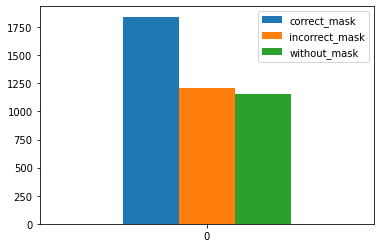

In [ ]:
lables = [ 'correct_mask', 'incorrect_mask', 'without_mask' ]
count_files = []
for i in lables:
  path, dirs, files = next(os.walk("/content/dataset/"+i))
  count_files.append(len(files))

df = pd.DataFrame(data={'correct_mask': [count_files[0]],
                        'incorrect_mask': [count_files[1]],
                        'without_mask': [count_files[2]]})
df.plot.bar(rot=0)
print (df)

In [ ]:
train_images = []
train_labels = []
validation_images = []    # validation
validation_labels = []    # validation
test_images = []
test_labels = []

CATEGORY = [ 'incorrect_mask', 'correct_mask', 'without_mask' ]
for category in CATEGORY:
    # tạo đường dẫn: dataset/"category"
    # với category là 1 trong 3 phần tử của mảng CATEGORY (dòng 40)
    path = os.path.join("/content/dataset", category)
    # lấy danh sách các file trong đường dẫn path
    listdir = os.listdir(path)
    # xáo trộn danh sách vừa lấy được ở trên.
    random.shuffle(listdir)
    # 70 phần trăm số lượng ảnh trong thư mục path
    _70_percent_train = int(len(listdir) * 0.7)
    # 15 phần trăm validation, còn lại sẽ là test
    _15_percent_validation = int(len(listdir) - _70_percent_train) // 2
    
    # in các thông tin về số lượng ảnh trong thư mục và số lượng ảnh sử dụng cho train, validation, và test
    print(f"{category} size: {len(listdir)}")
    print(f"train size: {_70_percent_train}")
    print(f"validation size: {_15_percent_validation}")
    print(f"test size: {len(listdir) - _70_percent_train - _15_percent_validation}\n")
    
    # training data
    first = 0
    last = _70_percent_train
    for img in listdir[first : last]:
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        preprocess_input(image)
        train_images.append(image)
        train_labels.append(category)
    
    # validation data
    first = last
    last = first + _15_percent_validation
    for img in listdir[first : last]:
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        preprocess_input(image)
        validation_images.append(image)
        validation_labels.append(category)

    # test data
    first = last
    for img in listdir[first : -1]:
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        preprocess_input(image)
        test_images.append(image)
        test_labels.append(category)

#Data normalization - chuẩn hóa dữ liệu
train_images = np.array(train_images, dtype='float32')
train_labels = np.array(train_labels)
validation_images = np.array(validation_images, dtype='float32')
validation_labels = np.array(validation_labels)
test_images = np.array(test_images, dtype='float32')
test_labels = np.array(test_labels)


incorrect_mask size: 1212
train size: 848
validation size: 182
test size: 182

correct_mask size: 1843
train size: 1290
validation size: 276
test size: 277

without_mask size: 1153
train size: 807
validation size: 173
test size: 173



Hiển thị ví dụ các ảnh ứng với từng class

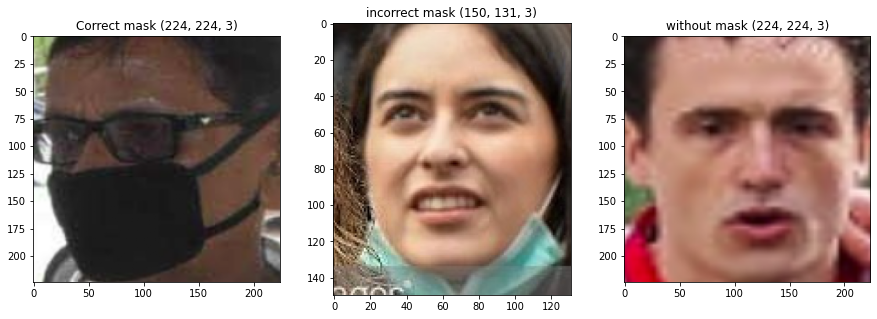

In [ ]:
import cv2
fig,ax = plt.subplots(1,3,figsize=(15,5))
img1 = mpimg.imread("/content/dataset/correct_mask/image_1047.png")
img2 = mpimg.imread("/content/dataset/incorrect_mask/cropped_gettyimages-1198073238-594x594_2.jpg")
img3 = mpimg.imread("/content/dataset/without_mask/image_0.png")

ax[0].imshow(img1)
ax[0].set_title("Correct mask " + str(img1.shape))

ax[1].imshow(img2)
ax[1].set_title("incorrect mask " + str(img2.shape))

ax[2].imshow(img3)
ax[2].set_title("without mask " + str(img3.shape))

plt.show()

**Tạo one-hot encoding**

In [ ]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
validation_labels = lb.fit_transform(validation_labels)
test_labels = lb.fit_transform(test_labels)

print ("train_labels:", train_labels)
print ("validation_labels:", validation_labels)
print ("test_labels:", test_labels[0])

train_labels: [[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]
validation_labels: [[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]
test_labels: [0 1 0]


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels)
validation_images, validation_labels = shuffle(validation_images, validation_labels)
test_images, test_labels = shuffle(test_images, test_labels)

##**3. Tiền xử lý và Chọn các tham số**

###**3.1. Data augmentation**
Trong Machine Learning, cũng như là Deep learning thì dữ liệu đóng vai trò vô cùng quan trọng. Tuy nhiên, trong một số trường hợp, vấn đề mà có ít dữ liệu để cho việc train model thì sẽ khó đạt được kết quả dự đoán mong muốn. Do đó nhóm em sử dụng một kỹ thuật gọi là **data augmentation** *(tăng cường dữ liệu)*  để phục vụ cho việc tăng cường thêm dữ liệu từ những dữ liệu đã có của nhóm. 

- Ví dụ như hình dưới, đó là các hình được tạo ra thêm từ một ảnh gốc ban đầu.
![plot1](https://drive.google.com/uc?export=view&id=1Oy8SvidbOF_kbtw7LTDelT9SgCISPAx3)

###**Data Agumentation trong keras**
Hình thức tăng dữ liệu phổ biến nhất với Keras là tăng dữ liệu "*tại chỗ*" hoặc "*nhanh chóng*" . Loại tăng dữ liệu này là những gì Keras ImageDataGenerator thực hiện. 

Hai điều cần lưu ý:

- Lớp Keras ImageDataGenerator là không trả về cả dữ liệu gốc và dữ liệu chuyển đổi - lớp ImageDataGenerator chỉ trả về ***dữ liệu chuyển đổi một cách ngẫu nhiên.***
- Gọi đây là tăng cường dữ liệu "*tại chỗ*" hoặc "*nhanh chóng*" bởi vì việc tăng cường này được thực hiện ***tại thời điểm đào tạo***.


Với Class ```ImageDataGenerator()```, có các thuộc tính sau :

- **zoom_range:** thực hiện zoom ngẫu nhiên trong một phạm vi nào đó. Kiểu ```float``` hoặc ```[Lower, upper]```
  - Nếu ```zoom_range = float```, thì ```[Lower, upper] = [1-zoom_range, 1 + zoom_range]```.

- **width_shift_range:** Dịch ảnh theo chiều ngang trong một phạm vi nào đó. Kiểu ```float, 1-D array-like``` hoặc ```int```
  - ```float```: một phần của chiều ngang, nếu ```float < 1```, hoặc pixels nếu ```float >= 1```.

  - ```1-D array-like```: các phần tử ngẫu nhiên từ mảng.

  - ```int```: số nguyên pixels trong khoảng ```(-width_shift_range, +width_shift_range)```

  - Với ```width_shift_range=2``` giá trị có thể là số nguyên trong khoảng ```[-1, 0, +1]```, tương tự với ```width_shift_range=[-1, 0, +1]```, trong khi với  ```width_shift_range=1.0``` giá trị có thể là số thực trong khoảng ```[-1.0, +1.0)```.

- **height_shift_range:** Dịch theo chiều dọc ngẫu nhiên trong một phạm vi nào đó. *(tương tự như ```width_shift_range```)*

- **brightness_range:** ```tuple``` hoặc danh sách hai số thực. Tăng cường độ sáng của ảnh trong một phạm vi nào đó.

- **vertical_flip:** ```boolean```. Lật ảnh ngẫu nhiên theo chiều dọc.

- **rotation_range:** ```int```. Xoay ảnh góc tối đa là 45 độ.

- **shear_range:** ```float```Làm méo ảnh (làm méo theo hướng ngược chiều kim đồng hồ tính bằng độ).

In [ ]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
    	rotation_range=40,
    	zoom_range=0.15,
    	width_shift_range=0.2,
    	height_shift_range=0.2,
    	shear_range=0.15,
    	horizontal_flip=True,
    	fill_mode="nearest")

###**3.2. Fine-tuning with Keras**

####**3.2.1. Pre-trained model and Transfer learning**

**Pre-trained:** *Mô hình đào tạo trước* là một mạng đã lưu được đào tạo trước đó trên một tập dữ liệu lớn, thường là trong các bài toán phân loại hình ảnh quy mô lớn.

**Transfer learning:** 
- Là việc ứng dụng kỹ năng/tri thức mình học được từ vấn đề này *(source domain)* với ứng dụng này *(source task)* sang vấn đề khác với ứng dụng khác có liên quan *(target domain)*

- Lý do mà nhóm em thử nghiệm việc sử dụng **transfer learning**:

  - **Không đủ dữ liệu:** Để tạo được mô hình đủ tốt, cần rất nhiều dữ liệu. Tuy nhiên, việc thu thập dữ liệu của nhóm còn hạn chế, số lượng ảnh dưới < 5000 ảnh nên việc train model ít nhiều không hiệu quả. Ngoài việc sử dụng kỹ thuật ***data augmentation*** trước đó, transfer learning là hướng tiếp cận tiếp theo được nhóm sử dụng.

  - **Không đủ tài nguyên:** Một vấn đề khi train model đó là nhóm thực hiện trên colab hoặc laptop cá nhân. Việc sử dụng cấu hình trên laptop, cũng như train model bằng CPU trên colab dấn đễn thời gian train rất lâu và hơi "xót" máy. Nên việc sử dụng Transfer learning sẽ góp phần giảm phần nào thời lượng training, cũng như giúp laptop "nghỉ ngơi".

  - **Cải thiện chất lượng:** Dự vào so sánh kết quả của model mà nhóm đào tạo từ đầu với việc sử dụng MobileNetV2 *(pre-trained)* thì việc sử dụng MobilNetV2 cho kết quả dự đoán tốt hơn. Lý do có thể do MobileNetV2 được train với dữ liệu lớn và học được tính khái quát hóa tốt hơn.

- **transfer learning** có nhiều dạng khác nhau, nhóm em sử dụng một dạng phổ biến là ***Fine tuning***.




####**3.2.2. Fine-tuning**

Có thể hiểu, fine-tuning là lấy 1 pre-trained model, tận dụng 1 phần hoặc toàn bộ các layer, thêm/sửa/xoá 1 vài layer/nhánh để tạo ra 1 model mới. Thường các layer đầu của model được freeze *(đóng băng)* lại - tức weight các layer này sẽ không bị thay đổi giá trị trong quá trình train. Lý do bởi các layer này đã có khả năng trích xuất thông tin mức trừu tượng thấp , khả năng này được học từ quá trình training trước đó. Đóng băng lại để tận dụng được khả năng này và giúp việc train diễn ra nhanh hơn *(model chỉ phải update weight ở các layer cao)*.

In [ ]:
dropout = 0.2
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
    
# tùy biến fc để gắn vào basemodel
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
    
headModel = Dropout(dropout)(headModel)
#Output layer là một softmax layer với 3 units hay 3 class
headModel = Dense(3, activation="softmax")(headModel)

# gắn headmodel vào cuối basemodel để tạo ra mô hình hoàn chỉnh
model = Model(inputs=baseModel.input, outputs=headModel)
    
#Các vòng lặp sau đây được thực hiện trên tất cả các lớp của mô hình cơ sở "đóng băng"
#để chúng không được cập nhật trong phiên đào tạo đầu tiên.
for layer in baseModel.layers:
    	layer.trainable = False


**2.2.1. Giải thích các dòng code**
- **```AveragePooling2D(pool_size=(7, 7))```**:

  ![AveragePooling2D](https://drive.google.com/uc?export=view&id=1QAHXQwJxNdgAB7F7vVcH88F4R6A_Y6zH)

- **```Dropout()```**: sẽ bỏ qua một vài unit trong suốt quá trình train trong mô hình, những unit bị bỏ qua được lựa chọn ngẫu nhiên. Một điều quan trọng của việc sử dụng ```dropout()`` để ngăn ngừa việc xảy ra ***overfitting***.
![dropout](https://drive.google.com/uc?export=view&id=1OXjHnbTNYO4xBQyrJjannaNqAQ9wRqZ_)

- **```Flatten(name="flatten")```**: hàm này biến mỗi điểm dữ liểu ở dạng một mảng nhiều chiều thành một mảng một chiều
![Flatten](https://drive.google.com/uc?export=view&id=1amTbagge2XsoawpBdy-Atz8D8pXmw6-c)


- **```Dense()```***: ```Dense``` thể hiện một *fully connected layer*, tức toàn bộ các unit của layer trước đó được nối với toàn bộ các unit của layer hiện tại.

  - **```Dense(3, activation="softmax")```**: 3 là số lớp dự đoán của bài; *Softmax* chuyển đổi một vectơ giá trị thành phân phối xác suất.




In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

###**3.3. Lựa chọn Dropout, Learning rate, Batch size**

####**3.3.1. So sánh Giá trị ```Dropout```**
*(Code đầy đủ ở "Code So sánh các giá trị dropout" phần III. Phụ lục)*

- Nhóm em so sánh việc train model với ```learning rate = 1e-3``` với giá trị ```dropout``` từ 0.0 đến 0.9. Vẽ biểu đồ so sánh giá trị *loss* và *accuracy* với từng ```dropout``` 

![acc_dropout](https://drive.google.com/uc?export=view&id=11Rqbq5i3tbZpQodcLyh7kowqSSG9lElq)

![loss_dropout](https://drive.google.com/uc?export=view&id=1ClsemLRGrDgYT8xkrpP5NHOgUsoCebv4)


Giá trị Dropout cho kết quả tốt khi giá trị ***Accuracy cao*** và ***Loss thấp***.

Dựa trên tiêu chí đó, giá trị tối ưu nhất là **Dropout=0.2** *(**loss = 0.2001** và **accuracy = 0.9157**)*. Ngoài ra, một giá trị Dropout có thể sử dụng được là **0.5**, Xét theo tiêu chí trên thì **Dropout=0.5** *(**loss = 0.206** và **accuracy = 0.9141**)* *(giá trị được làm tròn 4 chữ số)* chỉ xếp sau **Dropout=0.2**. Và đây cũng là 2 giá trị được sử dụng phổ biến nhất trong các mô hình CNN.


####**3.3.2. So sánh Giá trị ```learning rate```**
*(Code đầy đủ ở "Code So sánh các giá trị learning rate" phần III. Phụ lục)*

So sánh giá trị ```learning_rate``` với ```dropout=0.2```, ```batch_size=32```

Giải thích các màu:

- Màu Xanh dương *(blue)*: ***training accuracy***
- Màu Cam *(orange)*: ***validation accuracy***
- Màu Xanh lá cây *(green)*: ***training loss***
- Màu Đỏ *(red)*: ***validation loss***



![compare_lrate](https://drive.google.com/uc?export=view&id=1dQwKl8Ru9w3iuklkLejQywDjSof_l6po)

Nhận xét mà nhóm rút ra được:

- Với các tham số trên, với dataset của nhóm và bài toán mà nhóm đang xét thì giá trị *learning rate* có thể sử dụng được là ***1e-2=0.01***, ***1e-3=0.001*** và ***1e-4=0.0001***

- Các giá trị **```learning rate=[1e-0, 1e-1, 1e-5, 1e-6, 1e-7]```** không sử dụng để đạo tạo mô hình được. 

  - Với ***1e-0*** thì cho đường cong *loss* và *accuracy* của tập training và validation có giá trị bằng 0 từ ```epoch=2``` trở đi.
  - Với ***1e-1*** thì cho đường cong *loss* và *accuracy* của tập training và validation có giá trị xấp xỉ bằng 0 từ ```epoch=2``` trở đi.
  - Với ***1e-5*** thì cho đường cong *loss* có xu hướng tăng và *accuracy* có xu hướng giảm trên cả 2 tập training và validation.
  - Với ***1e-6, 1e-7*** thì cho đường cong *loss* và *accuracy* của tập training và validation thì thay đổi vị trí cho nhau. giá trị *loss* của cả hai tập cao hơn 1 và accuracy thì nhỏ hơn 0.75 đối với 1e-6 và xấp xỉ bằng 0.4 đối với 1e-7.


####**3.3.3. So sánh giá ```batch size```**
*(Code đầy đủ ở "Code so sánh các giá trị Batch size" phần III. Phụ lục)*


So sánh ```batch size``` với ```Dropout=0.2```, ```learning rate=[1e-2, 1e-3, 1e-4]```

Giải thích các màu:

- Màu Xanh dương *(blue)*: **```batch size = 32```**
- Màu Cam *(orange)*: **```batch size = 64```**
- Màu Xanh lá cây *(green)*: **```batch size = 128```**
- Màu Đỏ *(red)*: **```batch size = 256```**

![compare_batch-size](https://drive.google.com/uc?export=view&id=1-lxp2Fl90hzrJHF1X26fij-a1dPfR1ud)

Từ các biểu đồ trên, nhóm em rút ra một số nhận xét sau:

- **```batch size```** càng lớn thì:

  - *training loss* có xu hướng thoải hơn, giảm chậm hơn. Thể hiện bằng sự khác biệt độ dốc giữa đường màu đỏ (```batch size = 256```) và đường mày xanh dương (```batch size = 32```) rõ nhất ở ```learning rate = 0.0001``` *(1e-4)*

  - Giá trị nhỏ nhất của *validation loss* càng lớn.

  - Ở các biểu đồ với giá trị learning rate = 0.01 và 0.001, thì đường cong trong 2 biểu đồ *validation loss* không ổn định. Nếu so với các đường *training loss* tương ứng thì những đường *validation loss* di chuyển nhiễu xung quanh đường cong *training loss*. Điều này có thể lý giải là do validation dataset ít, không cung cấp đủ thông tin để đánh giá khả năng tổng quát hóa của mô hình. 

- Với giá trị ```dropout=0.2``` cố định và các ```learning rate``` và ```batch size``` khác nhau, nhóm em nhận thấy rằng đường cong ```batch_size=32``` ứng với biểu đồ ```learning_rate=1e-4=0.0001``` cho kết quả tốt cả hai đường *training loss* và *validation loss*. Bởi các đường cong *training loss* xấp xỉ và có một khoảng cách nhỏ giữa 2 đường với *validation loss* (ứng với mỗi batch size). 

Từ những phân tích trên, nhóm em sử dụng **```batch_size=32```** và **```learning_rate=1e-4```** là giá trị khởi điểm để thử nghiệm model

In [ ]:
EPOCHS = 50     #Number of epochs for training
BS = 32         #Training Batch Size
INIT_LR = 1e-4  #Learning rate for the network

#**V. TẠO VÀ TRAIN MODEL**

##**1. optimizer and Loss funtion**

###**1.1. Loss funtion**

**Classification losses**
Do bài toán của nhóm đưa ra có 3 lớp là: correct mask, incorrect mask và without mask nên sẽ thuộc bài toán *multi-class classification*

Theo nhóm em tìm hiểu là chọn lựa thì có 2 hàm loss được sử dụng phổ biến trong các bài toán phân lớp đơn giản:
- Multi-Class Cross-Entropy Loss 
- Kullback Leibler Divergence Loss

Trong đó: 
- ***Multi-Class Cross-Entropy Loss***: ```categorical_crossentropy```: gần như là hàm loss mặc định để sử dụng cho các bài toán phân loại nhiều lớp. Cross-entropy sẽ tính toán điểm tổng hợp sự khác biệt trung bình giữa phân phối xác suất thực tế và dự đoán cho tất cả các lớp trong bài toán. Điểm số được giảm thiểu và giá trị  cross-entropy hoàn hảo là 0. Tuy nhiên, các *train_labels, validation_labels, test_labels* của nhóm đều phải được mã hóa thành dạng *one-hot*. 

  Vấn đề với cross-entropy khi phân loại với một số lượng lớn các labels là một quá trình *one hot encoding*. Ví dụ, dự đoán các từ trong một từ vựng có thể có hàng chục hoặc hàng trăm nghìn loại, mỗi loại cho mỗi nhãn. Điều này có nghĩa là phần tử đích của mỗi ví dụ huấn luyện có thể yêu cầu một vectơ được *one hot encoding* với hàng chục hoặc hàng trăm nghìn giá trị 0, yêu cầu bộ nhớ đáng kể. Để giải quyết vấn đề này, có thể sử dụng ***Sparse Multiclass Cross-Entropy Loss***: ```sparse_categorical_crossentropy```: *Sparse cross-entropy* Giải quyết vấn đề trên bằng cách thực hiện cùng một phép tính toán sai số *cross-entropy* mà không yêu cầu biến đích phải được *one hot encoding* trước khi train,

- **Kullback Leibler Divergence Loss**: ```kullback_leibler_divergence``` được sử dụng phổ biến hơn để tính gần đúng các hàm phức tạp hơn là trong phân loại nhiều lớp.




###**1.2. Optimizer**

**Optimizers** là các thuật toán hoặc phương pháp được sử dụng để thay đổi các thuộc tính của mạng nơ-ron của bạn, chẳng hạn như trọng số *weights* và *learning rate* để giảm tổn thất.

#####**4.2.1. Gradient Descent**
Một trình tối ưu hóa cơ bản và phổ biến là **Gradient Descent** *(GD)*. Ý tưởng của **GD** xuất phát từ một điểm mà chúng ta coi là gần với nghiệm của bài toán, sau mỗi epochs thì cho nó tiến dần đến điểm cần tìm, tức đến khi đạo hàm gần với 0.

Tuy nhiên **GD** lại có nhiều hạn chế hơn là ưu điểm:
- Gradient Descent phụ thuộc vào nghiệm khởi tạo ban đầu và learning rate.
- *learning rate* quá lớn sẽ khiến cho thuật toán không hội tụ, quanh quẩn bên đích vì bước nhảy quá lớn; hoặc *learning rate* nhỏ ảnh hưởng đến tốc độ training.
 
Để giải quyết vấn đề đó, nhiều biến thể của **Gradient Descent** đã ra đời và hai trong số đó là:
- **Stochastic Gradient Descent** *(SGD)*: Với GD thông thường thì mỗi epoch ứng với 1 lần cập nhật weight *(trọng số)* với SGD thì mỗi epoch ứng với N lần cập nhật weight với N là số điểm dữ liệu. Thuật toán giải quyết được đối với cơ sở dữ liệu lớn mà *GD* không làm được. Phù hợp với online learning *(dữ liệu cập nhật liên tục)*
- **Mini-Batch Gradient Descent** *(mini-batch GD)*: Khác với SGD, mini-batch sử dụng một số lượng  n > 1 (n << N). Giống với SGD, Mini-batch Gradient Descent bắt đầu mỗi epoch bằng việc xáo trộn ngẫu nhiên dữ liệu rồi chia toàn bộ dữ liệu thành các mini-batch, mỗi mini-batch có n điểm dữ liệu. Mỗi lần cập nhật, thuật toán này lấy ra một mini-batch để tính toán đạo hàm rồi cập nhật. 

Tuy nhiên cả 3 trình tối ưu trên đều có các thách thức:
- Chọn giá trị *learning rate* tối ưu. Nếu learning rate quá nhỏ so với giảm độ dốc *(gradient descent)* có thể mất nhiều thời gian để hội tụ.
- Có thể bị mắc kẹt tại cực tiểu cục bộ.

![GD](https://drive.google.com/uc?export=view&id=16CUMd22UQmJgwvuFr-Q764TulVenEj9i)

Một trong những cách tối ưu của thuật toán **GD** và các biến thể **GD** là kết hợp với Momentum

![momentum](https://drive.google.com/uc?export=view&id=1gmCokt6FX2a9F6DFLYZrbCnjZxJFK7pT)![momentum](https://drive.google.com/uc?export=view&id=1TDlIwD8DIOpzrs2FbJn42bBgdvF82BAp)

Hình bên trái là đường đi của nghiệm khi không sử dụng Momentum, thuật toán hội tụ sau chỉ 5 vòng lặp nhưng nghiệm tìm được là nghiệm local minimun.

Hình bên phải là đường đi của nghiệm khi có sử dụng Momentum, hòn bi đã có thể vượt dốc tới khu vực gần điểm global minimun, sau đó dao động xung quanh điểm này, giảm tốc rồi cuối cùng tới đích. Mặc dù mất nhiều vòng lặp hơn, GD với Momentum cho chúng ta nghiệm chính xác hơn


Tận dụng những cải tiến đó, Trong nhiều năm trở lại đây, **Adam optimizer** nổi lên như người thay thế **Gradient Descent** với sự khắc phục được những nhược điểm của **Gradient Descent** và các biến thể của **GD**.

#####**4.2.2. Adam**
Adam đã được trình bày bởi *Diederik Kingma* từ OpenAI và *Jimmy Ba* từ Đại học Toronto trong bài báo *ICLR* có tiêu đề *“ Adam: A Method for Stochastic Optimization ”* năm 2015.

Thuật toán được gọi là Adam, và nguồn góc tên Adam theo tác giả là:

> *...the name Adam is derived from adaptive moment estimation.*

Tạm dịch: 

> *Cái tên Adam có nguồn gốc từ ước tính thời điểm thích ứng.*

Theo tác giả Adam là sự kết hợp những ưu điểm của hai thuật toán mở rộng từ *stochastic gradient descent*. Cụ thể:

- **Thuật toán Adaptive Gradient** *(AdaGrad)*: Không giống như các thuật toán trước đó thì learning rate hầu như giống nhau trong quá trình training (learning rate là hằng số), Adagrad coi learning rate là 1 tham số. Tức là Adagrad sẽ cho learning rate biến thiên sau mỗi thời điểm t. Yếu điểm của Adagrad là tổng bình phương biến thiên sẽ lớn dần theo thời gian cho đến khi nó làm tốc độ học cực kì nhỏ, làm việc training trở nên đóng băng.

- **Root Mean Square Communication** *(RMSProp)*: RMSprop giải quyết vấn đề tỷ lệ học giảm dần của Adagrad bằng cách chia tỷ lệ học cho trung bình của bình phương gradient.

Nói một cách đơn giản, Adam sử dụng **Momentum** và **Adaptive Learning Rates** *(Tỷ lệ học tập)* thích ứng để hội tụ nhanh hơn.

![adam](https://drive.google.com/uc?export=view&id=1ODFPvCBZzQMdfp_bn4_QMq6-zQfx9hwv)


Nhóm em sẽ khởi đầu bằng việc sử dụng **Cross-Entropy Loss** và **Adam optimizer**

In [ ]:
# biên dịch model
print("[INFO] compiling model...")
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


##**2. Early Stopping và ModelCheckpoint**

Một vấn đề với đào tạo mạng nơ-ron là ở việc lựa chọn số lượng epochs đào tạo để sử dụng. Việc chọn số epochs quá lớn có thể dẫn đến *overfiting* tập dữ liệu đào tạo, trong khi quá ít có thể dẫn đến mô hình *underfit*. *Early Stopping* là phương pháp cho phép chỉ định một số lượng epochs để đào tạo và dừng đào tạo khi hiệu suất mô hình ngừng cải thiện trên *validation dataset*

In [ ]:
es = callbacks.EarlyStopping(monitor ="val_loss", 
                              mode ="min", verbose=1,  patience = 10, 
                              restore_best_weights = True)

- các tham số:

    - **```monitor ="val_loss"```**	giá trị *validation loss* được theo dõi giám sát. Ngoài ra nó có thể là giá trị *validation accuracy*. 

    - **```mode = "min"```:**	Ở chế độ ```min``` quá trình đào tạo sẽ dừng lại khi số lượng được theo dõi ngừng giảm. Nếu ```monitor = "val_loss"```
        - Ngoài ra còn 2 chế độ là ```{"auto", "max"}``` . 
        - ở chế độ ```max``` nó sẽ dừng khi số lượng được theo dõi ngừng tăng lên. Nếu ```monitor = accuracy```
        - Ở chế độ ```auto```, hướng được tự động suy ra từ tên của đại lượng được giám sát. 

    - **```patience = 5```**:	*int*. Sau 5 epochs mà giá trị *validation loss* không có sự cải thiện thì quá trình đào tạo sẽ bị dừng. 

    - **```restore_best_weights = True```**:	*boolean*. Có khôi phục trọng số mô hình từ epochs với giá trị tốt nhất của số lượng được giám sát hay không. Nếu ```True``` là có, Ngược lại nếu ```False```, trọng số mô hình thu được ở bước huấn luyện cuối cùng sẽ được sử dụng.

Tuy nhiên một vấn đề khác là *callback EarlyStopping* sẽ ngừng đào tạo khi mô hình ngừng cải thiện, nhưng các mô hình ở phần cuối của huấn luyện thể không phải là mô hình với hiệu suất tốt nhất trên các tập dữ liệu xác nhận. 

Việc thêm một ***callback ModelCheckpoint*** sẽ lưu mô hình tốt nhất được quan sát trong quá trình đào tạo để sử dụng sau này. Trong bài toán này nhóm em sẽ sử dụng nó chỉ để lưu các mô hình tốt nhất quan sát được quá trình train theo phép đo được thực hiên trên *validation dataset*.

In [ ]:
mc = callbacks.ModelCheckpoint('mask_detector_best_mobileNetV2_32_1e-4.h5',
                              monitor='val_accuracy', 
                              mode='max', verbose=1, 
                              save_best_only=True)


- Các tham số:
  - **```filebatch```**: *mask_detector_best_mobileNetV2_32_1e-3.h5*. Đây tên và định dạng mô hình được lưu tại thư mục trên colab. Và nó không bao gồm các tùy chọn đặt tên khác.
  - **```monitor='val_accuracy'```**: chỉ số cần theo dõi
  - **```save_best_only=True```*** nó chỉ lưu khi mô hình được coi là "*tốt nhất*" do ```filepath``` không chứa các tùy chọn định dạng như ```{epoch}``` thì ```filepath``` sẽ bị ghi đè bởi mỗi mô hình mới tốt hơn.
  - **```mode='max'```**: ghi đè tệp lưu hiện tại với một tệp mà giá trị *val_accuracy* cao hơn. Đối với *val_loss* thì ```mode=min```.
  - **```verbose=1```**: biết giá trị của phép đo hiệu suất của mô hình được lưu vào thời điểm nào.

##**3. Keras fit()**


Các đối số của phương thức ```keras fit()``` trước khi bắt đầu xây dựng mô hình của mình.

- Đối số đầu tiên là trình lặp cho các hình ảnh tàu mà chúng ta nhận được từ phương thức ```flow ()```.

- ```Epochs``` là số epochs huấn luyện mô hình

- ```Steps_per_epoch``` là một đối số quan trọng. Nó chỉ định số lượng batches hình ảnh trong một epochs duy nhất. Nó thường được lấy bằng chiều dài của tập dữ liệu gốc chia batch size.

- ```Validation_data``` lấy tập dữ liệu xác thực hoặc đầu ra của trình tạo xác thực từ phương thức trình tạo.

- ```Validation_steps``` tương tự như ```step_per_epoch```, nhưng cho validation data. Điều này cũng có thể được sử dụng khi bạn đang tăng cường các tập hình ảnh validation.

- ```callbacks```: Danh sách các lệnh gọi lại sẽ được gọi trong quá trình đào tạo.

###**3.1. Train model**

In [ ]:
dropout = 0.2
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
    
# tùy biến fc để gắn vào basemodel
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
    
headModel = Dropout(dropout)(headModel)
#Output layer là một softmax layer với 3 units hay 3 class
headModel = Dense(3, activation="softmax")(headModel)

# gắn headmodel vào cuối basemodel để tạo ra mô hình hoàn chỉnh
model = Model(inputs=baseModel.input, outputs=headModel)
    
#Các vòng lặp sau đây được thực hiện trên tất cả các lớp của mô hình cơ sở "đóng băng"
#để chúng không được cập nhật trong phiên đào tạo đầu tiên.
for layer in baseModel.layers:
    	layer.trainable = False

# construct the training image generator for data augmentation
aug = ImageDataGenerator(
    	rotation_range=40,
    	zoom_range=0.15,
    	width_shift_range=0.2,
    	height_shift_range=0.2,
    	shear_range=0.15,
    	horizontal_flip=True,
    	fill_mode="nearest")

EPOCHS = 200     #Number of epochs for training
BS = 32         #Training Batch Size
INIT_LR = 1e-4  #Learning rate for the network

# biên dịch model
print("[INFO] compiling model...")
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

es = callbacks.EarlyStopping(monitor ="val_loss", 
                              mode ="min", verbose=1,  patience = 10, 
                              restore_best_weights = True)
mc = callbacks.ModelCheckpoint('mask_detector_mobileNetV2.h5',
                              monitor='val_accuracy', 
                              mode='max', verbose=1, 
                              save_best_only=True)
# huấn luyện fc
print("[INFO] training head...")
H = model.fit(
    	aug.flow(train_images, train_labels, batch_size=BS),
    	steps_per_epoch=len(train_images) // BS,
    	validation_data=(validation_images, validation_labels),
    	validation_steps=len(validation_images) // BS,
    	epochs=EPOCHS, callbacks =[es, mc])



9412608/9406464 [==============================] - 0s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/200
92/92 [==============================] - 69s 420ms/step - loss: 0.6550 - accuracy: 0.7161 - val_loss: 0.3338 - val_accuracy: 0.8796

Epoch 00001: val_accuracy improved from -inf to 0.87956, saving model to mask_detector_mobileNetV2.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/200
92/92 [==============================] - 37s 405ms/step - loss: 0.3786 - accuracy: 0.8503 - val_loss: 0.2812 - val_accuracy: 0.8891

Epoch 00002: val_accuracy improved from 0.87956 to 0.88906, saving model to mask_detector_mobileNetV2.h5
Epoch 3/200
92/92 [==============================] - 37s 404ms/step - loss: 0.3209 - accuracy: 0.8685 - val_loss: 0.2400 - val_accuracy: 0.9049

Epoch 00003: val_accuracy improved from 0.88906 to 0.90491, saving model to mask_detector_mobileNetV2.h5
Epoch 4/200
92/92 [==============================] - 37s 403ms/step - loss: 0.2950 - accuracy: 0.8816 - val_loss: 0.2244 - val_accuracy: 0.9113

Epoch 00004: val_accuracy improved from 0.90491 to 0.91125, saving model to mask_detector_mobileNetV2.h5
Epoch 5/200
92/92 [==============================] - 37s 398ms/step - loss: 0.2735 - accuracy: 0.8929 - val_loss: 0.2170 - val_accuracy: 0.9176

Epoch 00005: val_accuracy improved from 0.91125 to 0.91759, saving model to mask_detector_mobileNetV2.h5


###**3.2. Predict test data**

In [ ]:
# serialize the label encoder to disk
print("[INFO] saving label encoder...")
#f = open(config.ENCODER_PATH, "wb")
f = open("label_encoder_mobileNetV2", "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] saving label encoder...


In [ ]:
model = load_model('mask_detector_mobileNetV2.h5')

# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(test_images, batch_size=BS)
    
# mội ảnh sẽ được mô hình đoán ra 3 xác suất tương ứng với 3 nhãn
# tạo ra một mảng mà mỗi phần tử là index của nhãn có xác suất cao nhất.
predIdxs = np.argmax(predIdxs, axis=1)
    
# in ra thống kê kết quả của tập test
print(classification_report(test_labels.argmax(axis=1), predIdxs,
	target_names=['correct_mask', 'incorrect_mask', 'without_mask']))

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print("test loss: ", test_loss)
print("test accuracy: ", test_acc)
print ("score validation set:")
validation_loss, validation_acc = model.evaluate(validation_images,  validation_labels)
print ("score training set:")
train_loss, train_acc = model.evaluate(train_images,  train_labels)

#print("[INFO] saving mask detector model...")
#model.save("mask_detector_mobileNetV2_{lr}.model".format(lr=INIT_LR), save_format="h5")

[INFO] evaluating network...
                precision    recall  f1-score   support

  correct_mask       0.93      0.95      0.94       276
incorrect_mask       0.90      0.88      0.89       181
  without_mask       1.00      0.98      0.99       172

      accuracy                           0.94       629
     macro avg       0.94      0.94      0.94       629
  weighted avg       0.94      0.94      0.94       629

20/20 [==============================] - 11s 90ms/step - loss: 0.1550 - accuracy: 0.9380
test loss:  0.15496237576007843
test accuracy:  0.9379968047142029
score validation set:
20/20 [==============================] - 2s 106ms/step - loss: 0.1664 - accuracy: 0.9477
score training set:
93/93 [==============================] - 8s 86ms/step - loss: 0.1303 - accuracy: 0.9497


###**3.3. Plot training/validation Loss và Accuracy**

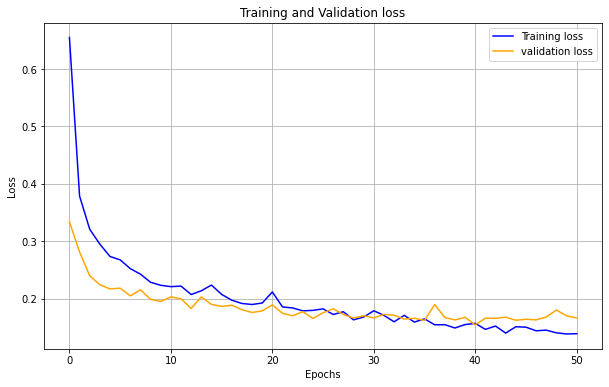

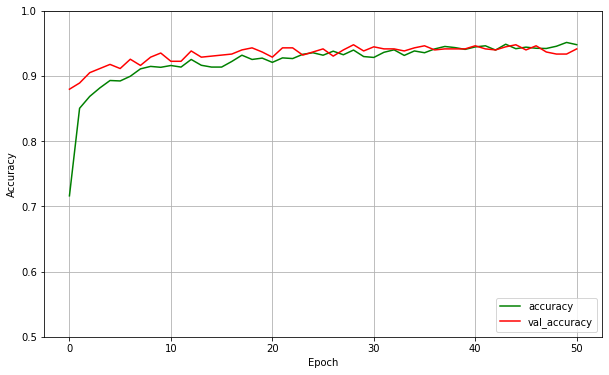

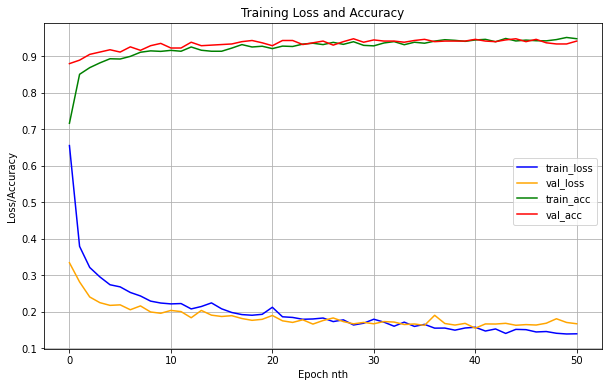

In [ ]:
plt.figure(figsize=(10,6))
plt.plot( H.history['loss'], 'blue', label='Training loss')
plt.plot(H.history['val_loss'], 'orange', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig("plot_mobileNetV2_loss")
plt.show()

#%%
plt.figure(figsize=(10,6))
plt.plot(H.history['accuracy'], 'green', label='accuracy')
plt.plot(H.history['val_accuracy'], 'red', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("plot_mobileNetV2_acc")

plt.figure(figsize=(10,6))
plt.plot(H.history["loss"], 'blue',label="train_loss")
plt.plot(H.history["val_loss"], 'orange', label="val_loss")
plt.plot(H.history["accuracy"], 'green', label="train_acc")
plt.plot(H.history["val_accuracy"], 'red', label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch nth")
plt.ylabel("Loss/Accuracy")
plt.legend(bbox_to_anchor = (1, 0.6))
plt.grid(True)
plt.savefig("plot_mobileNetV2_total")

##**4. So sánh các Model sử dụng hàm Loss/Optimizer**

Với **```patience = 10```** của *callback.EarlyStopping* thay vì mô hình sẽ dừng ngay khi đường cong *val_loss* có dấu hiệu overfiting thì mô hình sẽ đợi thêm 10 epochs nữa nếu mô hình không có cải thiện sẽ kết thúc việc đào tạo.

Việc đào tạo dừng lại ở ```epochs = 48```, tức là mô hình sẽ bắt đầu overfiting từ epochs thứ 49. Do đó, số epochs tối ưu để đào tạo train dataset của nhóm là 48. Ta có thể nhìn vào biểu đồ *Training and Validation loss*, ở những epoch gần 50 thì *Training loss* có xu hướng giảm nhưng *Validation loss* thì đang có xu hướng tăng, lý giải cho điều này là mô hình bắt đầu overfit.


###**4.1. So sánh Model sử dụng Kullback Leibler Divergence Loss**
*(code đầy đủ ở "Code so sánh Model với optimizer function và learning rate" phần III. Phụ lục)*

Trên đây nhóm em đã thử nghiệm mô hình với **```batch size=32```**, **```learning rate=1e-4=0.0001```**, sử dụng **```callbacks.EarlyStopping```** và **```callbacks.ModelCheckpoint```**.

Bên cạnh đó, nhóm em còn đào tạo mô hình với ***Kullback Leibler Divergence Loss*** và learning rate = 0.001 và 0.0001 và vẽ biểu đồ so sánh với ***Multi-Class Cross-Entropy Loss***.


Giải thích màu:
- Màu Xanh dương *(blue)*: ***Training loss***
- Màu Cam *(orange)*: ***Validation loss***
- Màu Xanh lá *(green)*: ***Training accuracy***
- Màu Đỏ *(red)*: ***Validation accuracy***

![compare_loss-lrate](https://drive.google.com/uc?export=view&id=1k_qzdryj5rlvQZ9XN1AIxAx71KFG1fmx)

![score_loss-lrate](https://drive.google.com/uc?export=view&id=1pyDi7JGbrHo7qH99BOVfljf8nSIryZQr)


**Nhận xét:**

- Thường sẽ ít người sử dụng ***Kullback Leibler Divergence Loss*** trong các bài toán phân lớp đơn giản như thế này. Tuy nhiên, không phải vì thế mà hàm loss này cho kết quả tệ. Thậm chí ở ```learning rate=0.001``` thì sử dụng *Kullback Leibler Divergence Loss* cho kết quả điểm accuracy trên *test data* tốt hơn khi sử dụng *Multi-Class Cross-Entropy Loss*. *(0.926868 > 0.920509)*

- Việc sử dụng ***Kullback Leibler Divergence Loss*** cho đường cong *validation loss* sẽ khớp hơn với sự tăng giảm của *training loss* *(ở biểu đồ learning rate = 0.001)*

###**4.2. So sánh Model sử dụng Adam optimizer vs SGD Nesterov Momentum**
*(code đầy đủ ở "Model với SGD Nesterov Momentum" phần III. Phụ lục)*

- **Hình trái** là model sử dụng *Adam optimer*
- **Hình phải** là model sử dụng *SGD Nesterov Momentum*

![SGD-Adam](https://drive.google.com/uc?export=view&id=1B9lQa8BRU_R4pFlFhVLgTMw7Yzqk6TEr)

**Nhận xét:**

- Khi sử dụng EarlyStopping thì số lượng epoch của model Adam là 48. Trong khi đó model sử dụng SGD Nesterov Momentum có số lượng epoch là 131 gấp gần 3 lần so với Adam optimizer. Ngoài ra, khi train model với Adam optimizer thời gian train nhanh hơn (khoảng 45 phút trên colab chạy bằng CPU) so với SGD Nesterov Momentum (~4 giờ).
- Model sử dụng SGD Nesterov Momentum hội tụ chậm hơn khi sử dụng Adam optimizer. Tới epoch thứ 131 thì đường cong *validation loss* mới bắt đầu có dấu hiệu overfitting, trong khi ở Adam optimizer thì ở epoch thứ 48 mô hình đã có dấu hiệu overfit.
- Đường cong *Training loss* khi sử dụng SGD Nesterov Momentum dích dắc hơn và giảm đều hơn Adam optimizer. Trong khi đó, đường cong *Validation loss* của SGD Nesterov Momentum khá bằng phẳng, ít nhiễu và có giữ được một khoảng cách nhỏ so với *Training loss*. Còn ở Adam optimizer thì 2 đường cong loss xấp xỉ nhau, cắt nhau nhiều.
- Đường cong *Validation Accuracy* của SGD Nesterov Momentum luôn lớn hơn *Training accuracy* trong 131 epochs. Tương tự như *Training loss* thì *Training accuracy* của SGD Nesterov Momentum cũng dích dắc và tăng chậm đều. Còn ở phía ngược lại, Adam optimizer cho 2 đường cong *accuracy* xấp xỉ và cắt lẫn nhau.

*(Mô hình sử dụng **SGD Nesterov Momentum** được Đánh giá trên tập test)*
![SGD-score](https://drive.google.com/uc?export=view&id=1BUOyco11RtQcrmz9ijjZAnMUNYGBvEyl) 

*(Mô hình sử dụng **Adam optimizer** được Đánh giá trên tập test)*
![Adam-score](https://drive.google.com/uc?export=view&id=1F0MaeyJd2oEKIWr8Zx9xTit7cM6It2OG)

So sánh khi kiểm tra mô hình trên tập test, nhóm em nhận thấy:
- Accuracy của 2 mô hình không chênh lệch nhau nhiều, dù Adam optimizer nhỉnh hơn SGD Nesterov Momentum *(0.937996 > 0.931637)*.
- Loss thì Adam optimizer vẫn nhỉnh hơn SGD Nesterov Momentum *(0.175242 < 0.187769)*.
- Ngoài ra, khi so với các phép đánh giá như: *precision, recall, f1-score* thì Adam optimizer luôn nhỉnh hơn ít nhất 0.01 so với SGD Nesterov Momentum.

==> Xu hướng những năm gần đây là việc sử dụng Adam optimizer vì lẽ nó khắc phục đường nhiều điểm yếu của Gradient Descent và nó không yêu cầu người sử dụng phải điều chỉnh hoặc chọn các tham số bằng tay nữa. Tuy nhiên **GD** vẫn là cơ sở để có được Adam và Adam xây dựng được dựa trên những cải tiến của GD. Nếu sử dụng những biến thể của **GD** (như SGD) và thêm vào đó những cải tiến *(SGD Nesterov Momentum)*, điều chỉnh các thông số để phù hợp với tập dữ liệu của mình thì tụi em nghĩ nó sẽ là đối thủ cạnh tranh với Adam optimizer. Và theo nhóm em nhận định, việc sử dụng SGD Nesterov Momentum trên tập dữ liệu của nhóm em cho kết quả mô hình nhỉnh hơn sử dụng Adam optimizer (So sánh biểu đồ đường cong ở trên)*

----------------
#**VI. PHỤ LỤC**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##**1. Code so sánh giá trị dropout**

Dropout:  0.0
9412608/9406464 [==============================] - 0s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/35
92/92 [==============================] - 81s 853ms/step - loss: 0.3934 - accuracy: 0.8407 - val_loss: 0.2464 - val_accuracy: 0.8938
Epoch 2/35
92/92 [==============================] - 78s 850ms/step - loss: 0.2445 - accuracy: 0.8998 - val_loss: 0.2025 - val_accuracy: 0.9113
Epoch 3/35
92/92 [==============================] - 78s 847ms/step - loss: 0.2379 - accuracy: 0.9077 - val_loss: 0.1969 - val_accuracy: 0.9239
Epoch 4/35
92/92 [==============================] - 78s 847ms/step - loss: 0.2064 - accuracy: 0.9207 - val_loss: 0.1995 - val_accuracy: 0.9160
Epoch 5/35
92/92 [==============================] - 78s 846ms/step - loss: 0.1845 - accuracy: 0.9234 - val_loss: 0.2171 - val_accuracy: 0.9160
Epoch 6/35
92/92 [==============================] - 78s 848ms/step - loss: 0.1872 - accuracy: 0.9258 - val_loss: 0.1972 - val_accuracy: 0.9113
Epoch 7/35
92/9

FileNotFoundError: ignored

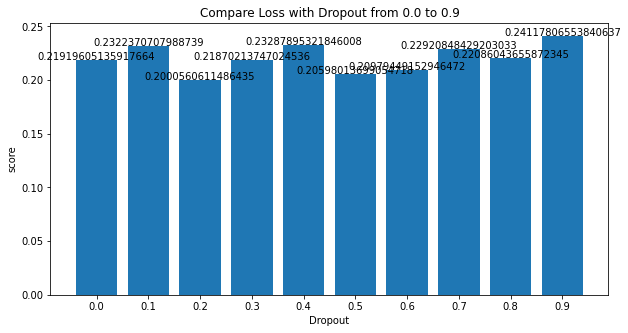

In [ ]:
import copy
result = {} 
y = {} 
loss = [] 
acc = [] 

EPOCHS = 35     #epochs
BS = 32         #batch_size
INIT_LR = 1e-3  #learning rate

dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
for dropout in dropouts: 
  print("Dropout: ", (dropout))

  baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
  headModel = baseModel.output
  headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
  headModel = Flatten(name="flatten")(headModel)
  headModel = Dense(128, activation="relu")(headModel)
  headModel = Dropout(dropout)(headModel)
  headModel = Dense(3, activation="softmax")(headModel)
  model = Model(inputs=baseModel.input, outputs=headModel)
        layer.trainable = False
  print("[INFO] compiling model...")
  opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
  model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
      
  earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                          mode ="min", patience = 5, 
                                          restore_best_weights = True)
  
  # huấn luyện fc
  print("[INFO] training head...")
  H = model.fit(
        aug.flow(train_images, train_labels, batch_size=BS),
        steps_per_epoch=len(train_images) // BS,
        validation_data=(validation_images, validation_labels),
        validation_steps=len(validation_images) // BS,
        epochs=EPOCHS, callbacks =[earlystopping])
  
  test_loss, test_acc = model.evaluate(test_images,  test_labels)
  y[dropout] = model.predict(test_images)
  print("test loss: ", test_loss)
  print("test accuracy: ", test_acc)
  result[dropout] = copy.deepcopy(H.history) 
  loss.append(test_loss) 
  acc.append(test_acc)


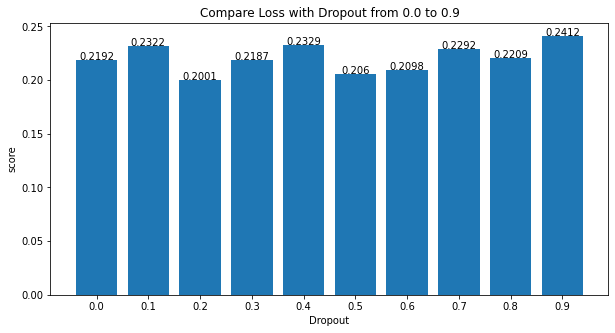

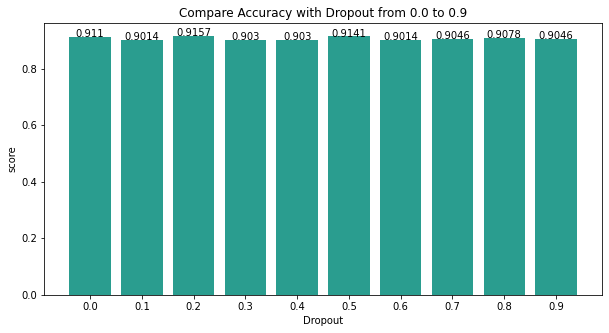

In [ ]:
# function to add value labels
x_dropout =['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9']
def addlabels(x,y):
	for i in range(len(x)):
		plt.text(i, round(y[i],4), round(y[i],4), ha = 'center')
	
# Loss plot
plt.figure(figsize = (10, 5))
	
plt.bar(x_dropout, loss)
addlabels(x_dropout, loss)
plt.title("Compare Loss with Dropout from 0.0 to 0.9")
plt.xlabel("Dropout")
plt.ylabel("score")
plt.savefig("plot_mobileNetV2_loss_dropout.png")
plt.show()

# Accuracy plot
plt.figure(figsize = (10, 5))
	
plt.bar(x_dropout, acc, color="#2a9d8f")
addlabels(x_dropout, acc)
plt.title("Compare Accuracy with Dropout from 0.0 to 0.9")
plt.xlabel("Dropout")
plt.ylabel("score")
plt.savefig("plot_mobileNetV2_acc_dropout.png")
plt.show()

##**2. Code So sánh các giá trị learning rate**

learning_rates:  1.0
[INFO] compiling model...
[INFO] training head...
Epoch 1/20
92/92 [==============================] - 116s 1s/step - loss: 375.6030 - accuracy: 0.4205 - val_loss: 3.3456 - val_accuracy: 0.4358
Epoch 2/20
92/92 [==============================] - 112s 1s/step - loss: 1.3863 - accuracy: 0.4315 - val_loss: 1.5933 - val_accuracy: 0.4374
Epoch 3/20
92/92 [==============================] - 112s 1s/step - loss: 1.2089 - accuracy: 0.4377 - val_loss: 1.0589 - val_accuracy: 0.4374
Epoch 4/20
92/92 [==============================] - 112s 1s/step - loss: 1.0724 - accuracy: 0.4377 - val_loss: 1.0520 - val_accuracy: 0.4374
Epoch 5/20
92/92 [==============================] - 112s 1s/step - loss: 1.0710 - accuracy: 0.4384 - val_loss: 1.0504 - val_accuracy: 0.4374
Epoch 6/20
92/92 [==============================] - 112s 1s/step - loss: 1.0727 - accuracy: 0.4387 - val_loss: 1.0499 - val_accuracy: 0.4374
Epoch 7/20
92/92 [==============================] - 112s 1s/step - loss: 1.0663 -

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[INFO] compiling model...
[INFO] training head...
Epoch 1/20
92/92 [==============================] - 118s 1s/step - loss: 9.3391 - accuracy: 0.6904 - val_loss: 0.3647 - val_accuracy: 0.8938
Epoch 2/20
92/92 [==============================] - 114s 1s/step - loss: 0.5265 - accuracy: 0.7830 - val_loss: 0.7026 - val_accuracy: 0.8463
Epoch 3/20
92/92 [==============================] - 114s 1s/step - loss: 0.4918 - accuracy: 0.8318 - val_loss: 0.3247 - val_accuracy: 0.8986
Epoch 4/20
92/92 [==============================] - 114s 1s/step - loss: 0.4440 - accuracy: 0.8287 - val_loss: 0.3275 - val_accuracy: 0.8891
Epoch 5/20
92/92 [==============================] - 114s 1s/step - loss: 0.4876 - accuracy: 0.7940 - val_loss: 0.4557 - val_accuracy: 0.9081
Epoch 6/20
92/92 [==============================] - 114s 1s/step - loss: 0.5646 - accuracy: 0.8023 - val_loss: 0.3477 - val_accuracy: 0.9097
Epoch 7/20
92/92 [==============================] - 113s 1s/step - loss: 0.4269 - accuracy: 0.8524 - val

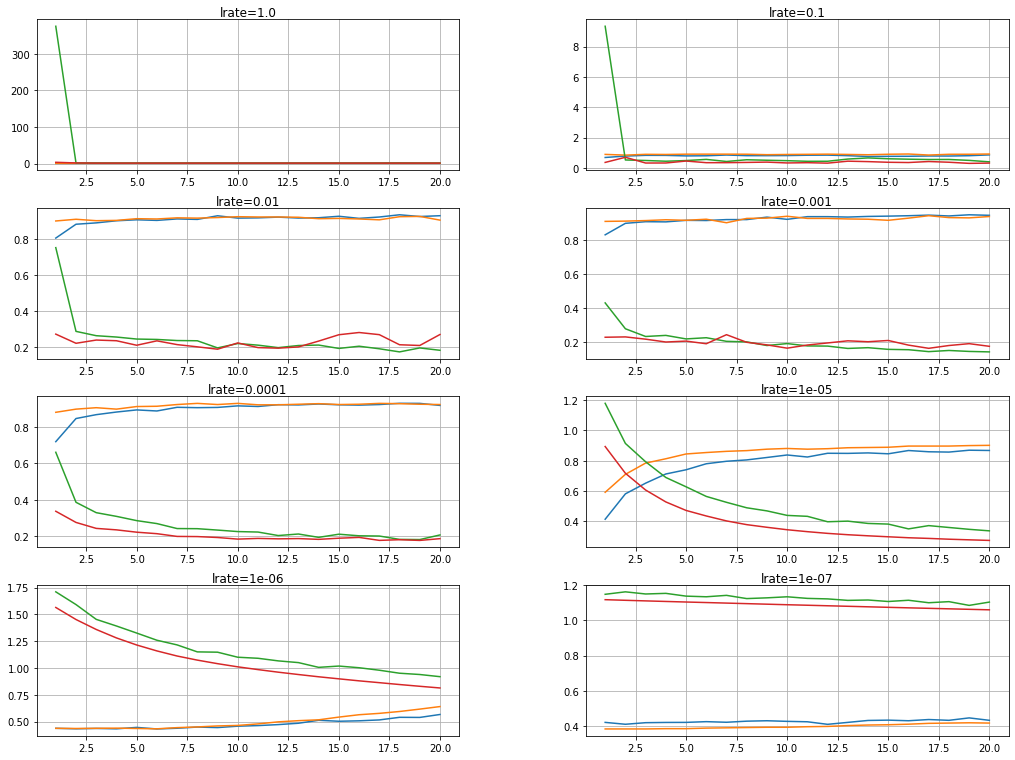

In [ ]:
from matplotlib import pyplot

EPOCHS = 20    #epochs
BS = 32         #batch_size
dropout = 0.2
epochs = range(1,EPOCHS+1)
def fit_model(INIT_LR):
  print ("learning_rates: ", INIT_LR) 
  aug = ImageDataGenerator(
    	rotation_range=40,
    	zoom_range=0.15,
    	width_shift_range=0.2,
    	height_shift_range=0.2,
    	shear_range=0.15,
    	horizontal_flip=True,
    	fill_mode="nearest")
    
  baseModel = MobileNetV2(weights="imagenet", include_top=False,
    	input_tensor=Input(shape=(224, 224, 3)))
    
  #tùy biến fc để gắn vào basemodel
  headModel = baseModel.output
  headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
  headModel = Flatten(name="flatten")(headModel)
  headModel = Dense(128, activation="relu")(headModel)
  headModel = Dropout(dropout)(headModel)
  headModel = Dense(3, activation="softmax")(headModel)
  model = Model(inputs=baseModel.input, outputs=headModel)
  for layer in baseModel.layers:
    	layer.trainable = False
    
  print("[INFO] compiling model...")
  opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
  model.compile(loss="categorical_crossentropy", optimizer=opt,
        metrics=["accuracy"])
    
  print("[INFO] training head...")
  H = model.fit(
        aug.flow(train_images, train_labels, batch_size=BS),
        steps_per_epoch=len(train_images) // BS,
        validation_data=(validation_images, validation_labels),
        validation_steps=len(validation_images) // BS,
        epochs=EPOCHS)
    
  print("[INFO] evaluating network...")
  predIdxs = model.predict(test_images, batch_size=BS)
  predIdxs = np.argmax(predIdxs, axis=1)
  print(classification_report(test_labels.argmax(axis=1), predIdxs,
    target_names=lb.classes_))
  
  plt.plot(epochs, H.history['accuracy'], label='accuracy')
  plt.plot(epochs, H.history['val_accuracy'], label='val_accuracy')
  plt.plot(epochs, H.history['loss'], label='loss')
  plt.plot(epochs, H.history['val_loss'], label='val_loss')
  plt.title('lrate='+str(INIT_LR), pad=-50)
  plt.grid(True)
 

# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
plt.figure(figsize=(15,5))
for i in range(len(learning_rates)):
	# determine the plot number
	plt.subplot(421 + i)
	# fit model and plot learning curves for a learning rate
	fit_model(learning_rates[i])
# show learning curves

plt.savefig("/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/final_project/plot_mobileNetV2_compare_lrate.png")
plt.savefig("plot_mobileNetV2_compare_lrate.png")
plt.subplots_adjust(top=2, bottom=0.01, left=0.05, right=0.95, hspace=0.25,
                    wspace=0.30)
plt.show()

##**3. Code so sánh các giá trị Batch size**

learning_rates:  0.01
Batch_size:  32
[INFO] compiling model...
[INFO] training head...
Epoch 1/20
92/92 [==============================] - 126s 1s/step - loss: 0.6662 - accuracy: 0.8167 - val_loss: 0.2594 - val_accuracy: 0.8986

Epoch 00001: val_accuracy improved from -inf to 0.89857, saving model to best_mobileNetV2_32_0.01.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
92/92 [==============================] - 123s 1s/step - loss: 0.2916 - accuracy: 0.8798 - val_loss: 0.2207 - val_accuracy: 0.9160

Epoch 00002: val_accuracy improved from 0.89857 to 0.91601, saving model to best_mobileNetV2_32_0.01.h5
Epoch 3/20
92/92 [==============================] - 125s 1s/step - loss: 0.2588 - accuracy: 0.8980 - val_loss: 0.2413 - val_accuracy: 0.9239

Epoch 00003: val_accuracy improved from 0.91601 to 0.92393, saving model to best_mobileNetV2_32_0.01.h5
Epoch 4/20
92/92 [==============================] - 124s 1s/step - loss: 0.2910 - accuracy: 0.8877 - val_loss: 0.2761 - val_accuracy: 0.9081

Epoch 00004: val_accuracy did not improve from 0.92393
Epoch 5/20
92/92 [==============================] - 125s 1s/step - loss: 0.2552 - accuracy: 0.9028 - val_loss: 0.2300 - val_accuracy: 0.9049

Epoch 00005: val_accuracy did not improve from 0.92393
Epoch 6/20
92/92 [==============================] - 126s 1s/step - loss: 0.2287 - accuracy: 0.9094 - val_loss: 0.2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:90: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[INFO] compiling model...
[INFO] training head...
Epoch 1/20
23/23 [==============================] - 127s 5s/step - loss: 2.3387 - accuracy: 0.6500 - val_loss: 0.3706 - val_accuracy: 0.8463

Epoch 00001: val_accuracy improved from -inf to 0.84628, saving model to best_mobileNetV2_128_0.01.h5
Epoch 2/20
23/23 [==============================] - 123s 5s/step - loss: 0.3927 - accuracy: 0.8342 - val_loss: 0.2780 - val_accuracy: 0.8970

Epoch 00002: val_accuracy improved from 0.84628 to 0.89699, saving model to best_mobileNetV2_128_0.01.h5
Epoch 3/20
23/23 [==============================] - 128s 6s/step - loss: 0.3510 - accuracy: 0.8640 - val_loss: 0.2545 - val_accuracy: 0.8891

Epoch 00003: val_accuracy did not improve from 0.89699
Epoch 4/20
23/23 [==============================] - 123s 5s/step - loss: 0.2940 - accuracy: 0.8836 - val_loss: 0.2494 - val_accuracy: 0.9002

Epoch 00004: val_accuracy improved from 0.89699 to 0.90016, saving model to best_mobileNetV2_128_0.01.h5
Epoch 5/20
23/2

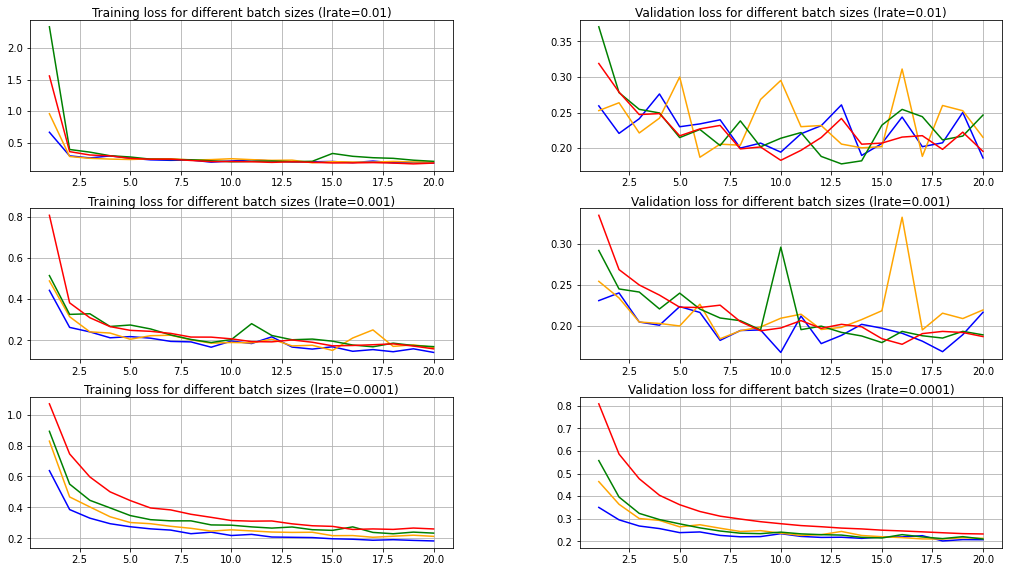

In [ ]:
EPOCHS = 20 
dropout = 0.2
Batch_size = [32, 64, 128, 256]
epochs = range(1,EPOCHS+1)
x = -2
plt.figure(figsize=(15,5))
learning_rates = [1e-2,1e-3,1e-4]
loss_score = []
acc_score = []
info = []
for INIT_LR in learning_rates:
  x += 2
  print ("learning_rates: ", INIT_LR) 
  for j in range(len(Batch_size)):
      BS = Batch_size[j]
      print ("Batch_size: ", BS) 

      aug = ImageDataGenerator(
          rotation_range=40,
          zoom_range=0.15,
          width_shift_range=0.2,
          height_shift_range=0.2,
          shear_range=0.15,
          horizontal_flip=True,
          fill_mode="nearest")

      baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
      headModel = baseModel.output
      headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
      headModel = Flatten(name="flatten")(headModel)
      headModel = Dense(128, activation="relu")(headModel)  
      headModel = Dropout(dropout)(headModel)
      headModel = Dense(3, activation="softmax")(headModel)
      model = Model(inputs=baseModel.input, outputs=headModel)

      for layer in baseModel.layers:
              layer.trainable = False

      print("[INFO] compiling model...")
      opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
      model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
            
        #es = callbacks.EarlyStopping(monitor ="val_loss", 
        #                                        mode ="min", verbose=1, patience = 5, 
        #                                        restore_best_weights = True)

      mc = callbacks.ModelCheckpoint('best_mobileNetV2_{bs}_{lr}.h5'.format(bs=Batch_size[j], lr=INIT_LR),
                                    monitor='val_accuracy', 
                                    mode='max', verbose=1, 
                                    save_best_only=True)
        
      # huấn luyện fc
      print("[INFO] training head...")
      H = model.fit(
              aug.flow(train_images, train_labels, batch_size=BS),
              steps_per_epoch=len(train_images) // BS,
              validation_data=(validation_images, validation_labels),
              validation_steps=len(validation_images) // BS,
              epochs=EPOCHS, callbacks =[mc])
        
      model = load_model('best_mobileNetV2_{bs}_{lr}.h5'.format(bs=Batch_size[j], lr=INIT_LR))
        
      print("[INFO] evaluating network...")
      predIdxs = model.predict(test_images, batch_size=BS)
      predIdxs = np.argmax(predIdxs, axis=1)
      print(classification_report(test_labels.argmax(axis=1), predIdxs,
          target_names=['correct_mask', 'incorrect_mask', 'without_mask']))
        
      test_loss, test_acc = model.evaluate(test_images,  test_labels)
      print("test loss: ", test_loss)
      print("test accuracy: ", test_acc)
      loss_score.append(test_loss)
      acc_score.append(test_acc)
      info.append("lrate={lr}_batch={bs}".format(lr=INIT_LR, bs=Batch_size[j]))


      plt.subplot(421 + x)   
      if j == 0:
          plt.plot(epochs, H.history['loss'], 'blue', label='batch_32')
      elif j == 1:
          plt.plot(epochs, H.history['loss'], 'orange', label='batch_64')
      elif j == 2:
          plt.plot(epochs, H.history['loss'], 'green', label='batch_128')
      elif j == 3:
          plt.plot(epochs, H.history['loss'], 'red', label='batch_256')

      plt.title('Training loss for different batch sizes (lrate='+str(INIT_LR)+')', pad=-50)
      plt.grid(True)
          
      plt.subplot(421 + x+1)
      if j == 0:
          plt.plot(epochs, H.history['val_loss'], 'blue', label='batch_32')
      elif j == 1:
          plt.plot(epochs, H.history['val_loss'], 'orange', label='batch_64')
      elif j == 2:
          plt.plot(epochs, H.history['val_loss'], 'green', label='batch_128')
      elif j == 3:
          plt.plot(epochs, H.history['val_loss'], 'red', label='batch_256')

      plt.title('Validation loss for different batch sizes (lrate='+str(INIT_LR)+')', pad=-50)

      plt.grid(True)


# show learning curves
plt.savefig("/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/final_project/plot_mobileNetV2_compare_batch.png")
plt.savefig("plot_mobileNetV2_compare_Batch.png")
plt.subplots_adjust(top=2, bottom=0.01, left=0.05, right=0.95, hspace=0.25,wspace=0.30)
plt.show()

##**4. Code so sánh Model với optimizer function và learning rate**

learning rate:  0.001
Loss function:  categorical_crossentropy
9412608/9406464 [==============================] - 0s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/30
92/92 [==============================] - 82s 859ms/step - loss: 0.4335 - accuracy: 0.8311 - val_loss: 0.2499 - val_accuracy: 0.8970

Epoch 00001: val_accuracy improved from -inf to 0.89699, saving model to mask_detector_mobileNetV2_0.001_Cross-Enropy.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/30
92/92 [==============================] - 79s 852ms/step - loss: 0.2741 - accuracy: 0.8905 - val_loss: 0.2126 - val_accuracy: 0.9065

Epoch 00002: val_accuracy improved from 0.89699 to 0.90650, saving model to mask_detector_mobileNetV2_0.001_Cross-Enropy.h5
Epoch 3/30
92/92 [==============================] - 78s 851ms/step - loss: 0.2394 - accuracy: 0.9053 - val_loss: 0.2296 - val_accuracy: 0.9049

Epoch 00003: val_accuracy did not improve from 0.90650
Epoch 4/30
92/92 [==============================] - 79s 856ms/step - loss: 0.2386 - accuracy: 0.9128 - val_loss: 0.1873 - val_accuracy: 0.9303

Epoch 00004: val_accuracy improved from 0.90650 to 0.93027, saving model to mask_detector_mobileNetV2_0.001_Cross-Enropy.h5
Epoch 5/30
92/92 [==============================] - 79s 858ms/step - loss: 0.2318 - accuracy: 0.9193 - val_loss: 0.2079 - val_accuracy: 0.9144

Epoch 00005: val_accuracy did not improve from 0.93027
Epoch 6/30
92/92 [==============================] - 80s 868ms/step

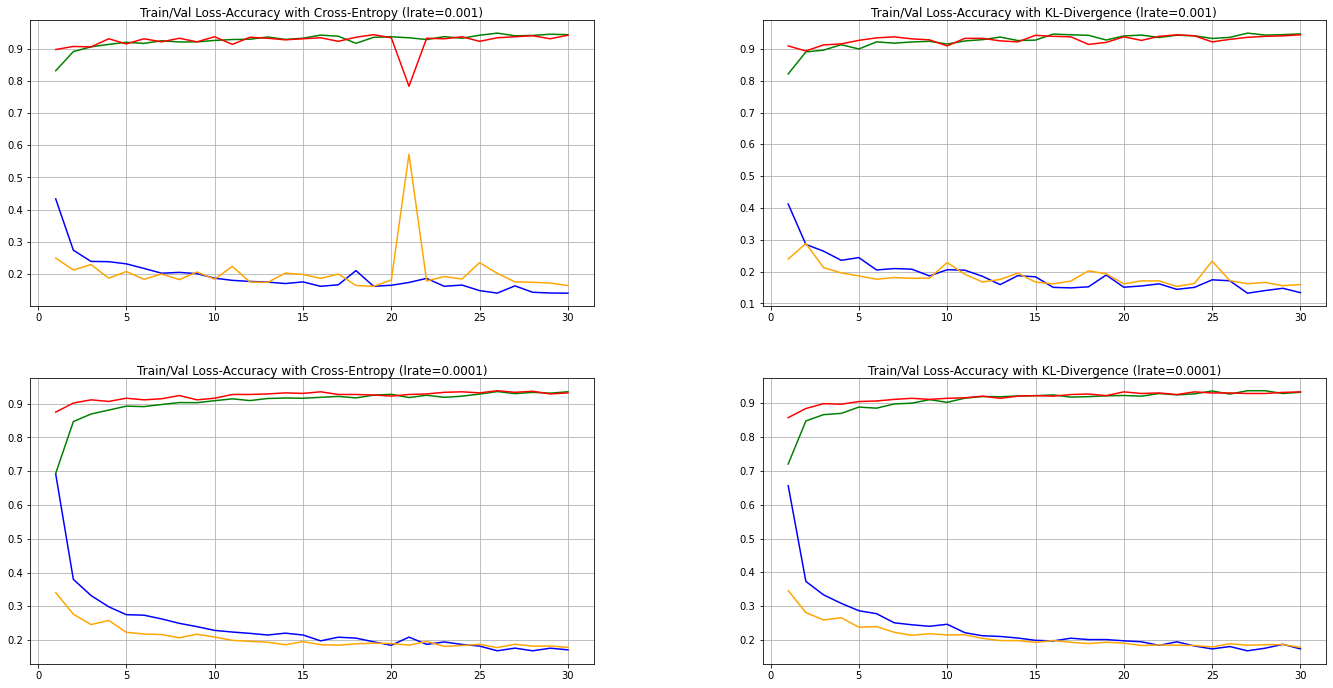

In [ ]:

EPOCHS = 30     #Number of epochs for training
BS = 32         #Training Batch Size
epochs = range(1,EPOCHS+1)
plt.figure(figsize=(15,6))
dropout = 0.2

loss_func = ['categorical_crossentropy', 'kullback_leibler_divergence']
name_loss = ['Cross-Enropy', 'KL-Divergence']
learning_rate = [1e-3, 1e-4]

loss_score_1e3 = []
acc_score_1e3= []
loss_score_1e4 = []
acc_score_1e4= []
x = -2
for i in range(2):
  INIT_LR = learning_rate[i]
  print ('learning rate: ', INIT_LR)
  x += 2
  for j in range(2):
    loss_function = loss_func[j]
    print ("Loss function: ", loss_function)

    aug = ImageDataGenerator(
          rotation_range=40,
          zoom_range=0.15,
          width_shift_range=0.2,
          height_shift_range=0.2,
          shear_range=0.15,
          horizontal_flip=True,
          fill_mode="nearest")

    baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
    headModel = baseModel.output
    headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(128, activation="relu")(headModel)
    headModel = Dropout(dropout)(headModel)
    headModel = Dense(3, activation="softmax")(headModel)
    model = Model(inputs=baseModel.input, outputs=headModel)
    for layer in baseModel.layers:
          layer.trainable = False


    # biên dịch model
    print("[INFO] compiling model...")
    opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
    model.compile(loss=loss_function, optimizer=opt, metrics=["accuracy"])

    mc = callbacks.ModelCheckpoint('mask_detector_mobileNetV2_{lr}_{opt}.h5'.format(lr=INIT_LR, opt=name_loss[j]),
                                  monitor='val_accuracy', 
                                  mode='max', verbose=1, 
                                  save_best_only=True)
    #es = callbacks.EarlyStopping(monitor ="val_loss", 
    #                              mode ="min", verbose=1,  patience = 5, 
    #                              restore_best_weights = True)

    # huấn luyện fc
    print("[INFO] training head...")
    H = model.fit(
          aug.flow(train_images, train_labels, batch_size=BS),
          steps_per_epoch=len(train_images) // BS,
          validation_data=(validation_images, validation_labels),
          validation_steps=len(validation_images) // BS,
          epochs=EPOCHS, callbacks =[mc])

    model = load_model('mask_detector_mobileNetV2_{lr}_{opt}.h5'.format(lr=INIT_LR, opt=name_loss[j]))

    # make predictions on the testing set
    print("[INFO] evaluating network...")
    predIdxs = model.predict(test_images, batch_size=BS)
    predIdxs = np.argmax(predIdxs, axis=1)
    print(classification_report(test_labels.argmax(axis=1), predIdxs,
      target_names=['correct_mask', 'incorrect_mask', 'without_mask']))

    test_loss, test_acc = model.evaluate(test_images,  test_labels)
    print("test loss: ", test_loss)
    print("test accuracy: ", test_acc)
    if i == 0:
      loss_score_1e3.append(test_loss)
      acc_score_1e3.append(test_acc)
    if i == 1:
      loss_score_1e4.append(test_loss)
      acc_score_1e4.append(test_acc)

    if j == 0:
      plt.subplot(221 + x)
      plt.plot(epochs, H.history["loss"], 'blue', label="train_loss")
      plt.plot(epochs, H.history["val_loss"], 'orange',label="val_loss")
      plt.plot(epochs, H.history["accuracy"], 'green', label="train_acc")
      plt.plot(epochs, H.history["val_accuracy"], 'red',label="val_acc")
      plt.title('Train/Val Loss-Accuracy with Cross-Entropy (lrate='+str(INIT_LR)+')', pad=-50)
      plt.grid(True)
          
    if j == 1:
      plt.subplot(221 + x+1)
      plt.plot(epochs, H.history["loss"], 'blue', label="train_loss")
      plt.plot(epochs, H.history["val_loss"], 'orange',label="val_loss")
      plt.plot(epochs, H.history["accuracy"], 'green', label="train_acc")
      plt.plot(epochs, H.history["val_accuracy"], 'red',label="val_acc")
      plt.title('Train/Val Loss-Accuracy with KL-Divergence (lrate='+str(INIT_LR)+')', pad=-50)
      plt.grid(True)


plt.subplots_adjust(top=1.5, bottom=0.01, left=0.05, right=1.25, hspace=0.25,wspace=0.30)
#plt.savefig("/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/final_project/plot_mobileNetV2_compare_optimizer.png")
plt.savefig("plot_mobileNetV2_compare_optimizer.png")
plt.show()

In [ ]:
d = {'loss function': name_loss,
     'test loss (1e-3)': loss_score_1e3,
     'test accuracy (1e-3)': acc_score_1e3,
     'test loss (1e-4)': loss_score_1e4,
     'test accuracy (1e-4)': acc_score_1e4}

df = pd.DataFrame(data=d)
df.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/final_project/score_mobileNetV2_compare_opt.csv')
df

,loss function,test loss (1e-3),test accuracy (1e-3),test loss (1e-4),test accuracy (1e-4)
0,Cross-Enropy,0.140842,0.920509,0.157479,0.923688
1,KL-Divergence,0.141280,0.926868,0.170844,0.915739


##**5. Model với SGD Nesterov Momentum**

- dropout = 0.2
- learning rate = 1e-4
- batch size = 32
- Momentum = 0.9
- epochs = 500 *(có sử dụng earlyStopping)*

In [ ]:
from tensorflow.keras.optimizers import SGD

dropout = 0.2
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(dropout)(headModel)
headModel = Dense(3, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
    	layer.trainable = False

aug = ImageDataGenerator(
    	rotation_range=40,
    	zoom_range=0.15,
    	width_shift_range=0.2,
    	height_shift_range=0.2,
    	shear_range=0.15,
    	horizontal_flip=True,
    	fill_mode="nearest")

EPOCHS = 500     #Number of epochs for training
BS = 32         #Training Batch Size
INIT_LR = 1e-4  #Learning rate for the network

# biên dịch model
print("[INFO] compiling model...")
sgd = SGD(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

es = callbacks.EarlyStopping(monitor ="val_loss", 
                              mode ="min", verbose=1,  patience = 10, 
                              restore_best_weights = True)
mc = callbacks.ModelCheckpoint('mask_detector_best_mobileNetV2_SGD_1e-4.h5',
                              monitor='val_accuracy', 
                              mode='max', verbose=1, 
                              save_best_only=True)
# huấn luyện fc
print("[INFO] training head...")
H = model.fit(
    	aug.flow(train_images, train_labels, batch_size=BS),
    	steps_per_epoch=len(train_images) // BS,
    	validation_data=(validation_images, validation_labels),
    	validation_steps=len(validation_images) // BS,
    	epochs=EPOCHS, callbacks =[es, mc])

[INFO] compiling model...
[INFO] training head...
Epoch 1/500
92/92 [==============================] - 125s 1s/step - loss: 0.9513 - accuracy: 0.5692 - val_loss: 0.6722 - val_accuracy: 0.7132

Epoch 00001: val_accuracy improved from -inf to 0.71315, saving model to mask_detector_best_mobileNetV2_SGD_1e-4.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/500
92/92 [==============================] - 120s 1s/step - loss: 0.6660 - accuracy: 0.7161 - val_loss: 0.5224 - val_accuracy: 0.8130

Epoch 00002: val_accuracy improved from 0.71315 to 0.81300, saving model to mask_detector_best_mobileNetV2_SGD_1e-4.h5
Epoch 3/500
92/92 [==============================] - 121s 1s/step - loss: 0.5609 - accuracy: 0.7662 - val_loss: 0.4487 - val_accuracy: 0.8368

Epoch 00003: val_accuracy improved from 0.81300 to 0.83677, saving model to mask_detector_best_mobileNetV2_SGD_1e-4.h5
Epoch 4/500
92/92 [==============================] - 118s 1s/step - loss: 0.5177 - accuracy: 0.7861 - val_loss: 0.4059 - val_accuracy: 0.8494

Epoch 00004: val_accuracy improved from 0.83677 to 0.84945, saving model to mask_detector_best_mobileNetV2_SGD_1e-4.h5
Epoch 5/500
92/92 [==============================] - 118s 1s/step - loss: 0.4802 - accuracy: 0.8078 - val_loss: 0.3847 - val_accuracy: 0.8542

Epoch 00005: val_accuracy improved from 0.84945 to 0.85420, saving mode

In [ ]:
model = load_model('mask_detector_best_mobileNetV2_SGD_1e-4.h5')

# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(test_images, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(test_labels.argmax(axis=1), predIdxs,
	target_names=['correct_mask', 'incorrect_mask', 'without_mask']))

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print("test loss: ", test_loss)
print("test accuracy: ", test_acc)

[INFO] evaluating network...
                precision    recall  f1-score   support

  correct_mask       0.91      0.97      0.94       276
incorrect_mask       0.91      0.85      0.88       181
  without_mask       0.99      0.97      0.98       172

      accuracy                           0.93       629
     macro avg       0.94      0.93      0.93       629
  weighted avg       0.93      0.93      0.93       629

20/20 [==============================] - 26s 819ms/step - loss: 0.1878 - accuracy: 0.9316
test loss:  0.18776902556419373
test accuracy:  0.9316375255584717


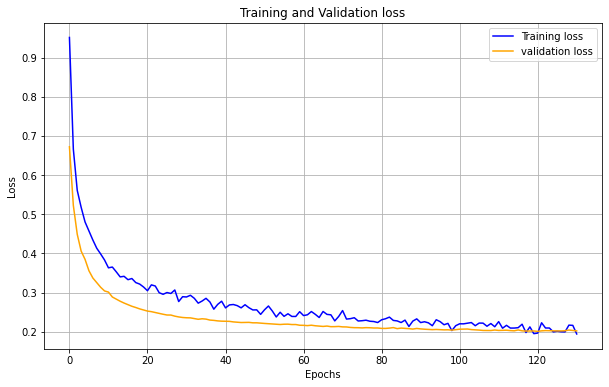

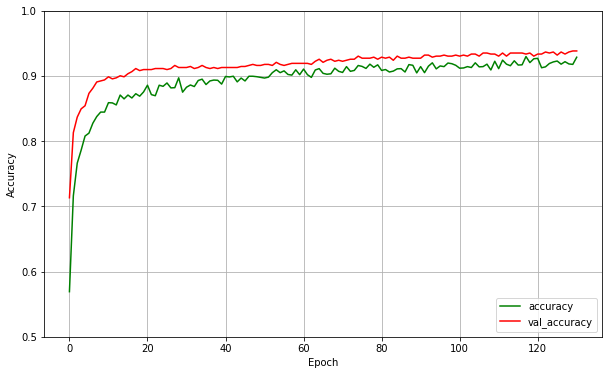

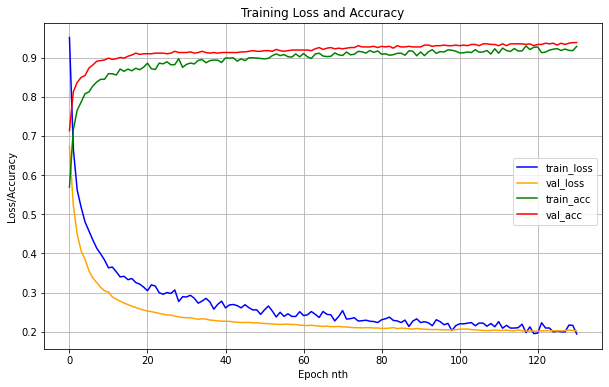

In [ ]:
eps = 131
plt.figure(figsize=(10,6))
plt.plot(H.history['loss'], 'blue', label='Training loss')
plt.plot(H.history['val_loss'], 'orange', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig("plot_mobileNetV2_SGD_loss_{lr}_{ep}.png".format(lr=INIT_LR, ep=eps))
plt.show()

#%%
plt.figure(figsize=(10,6))
plt.plot(H.history['accuracy'], 'green', label='accuracy')
plt.plot(H.history['val_accuracy'], 'red', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("plot_mobileNetV2_SGD_acc_{lr}_{ep}.png".format(lr=INIT_LR, ep=eps))
plt.show()

plt.figure(figsize=(10,6))
plt.plot(H.history["loss"], 'blue',label="train_loss")
plt.plot(H.history["val_loss"], 'orange', label="val_loss")
plt.plot(H.history["accuracy"], 'green', label="train_acc")
plt.plot(H.history["val_accuracy"], 'red', label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch nth")
plt.ylabel("Loss/Accuracy")
plt.legend(bbox_to_anchor = (1, 0.6))
plt.grid(True)
plt.savefig("plot_mobileNetV2_SGD_total_{lr}_{ep}.png".format(lr=INIT_LR, ep=eps))

#**VII. THAM KHẢO**

[1]:	K. Pykes, “Adam Optimization Algorithm”, Medium, tháng 6 06, 2020. https://towardsdatascience.com/adam-optimization-algorithm-1cdc9b12724a (truy cập tháng 7 12, 2021).

[2]:	“An overview of gradient descent optimization algorithms”, Sebastian Ruder, tháng 1 19, 2016. https://ruder.io/optimizing-gradient-descent/ (truy cập tháng 7 12, 2021).

[3]:	T. Vu, “Bài 8: Gradient Descent (phần 2/2)”, Tiep Vu’s blog, tháng 1 16, 2017. https://machinelearningcoban.com/2017/01/16/gradientdescent2/ (truy cập tháng 7 12, 2021).

[4]:	J. Brownlee, “How to Choose Loss Functions When Training Deep Learning Neural Networks”, Machine Learning Mastery, tháng 1 29, 2019. https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/ (truy cập tháng 7 12, 2021).

[5]:	K. Team, “Keras documentation: SGD”. https://keras.io/api/optimizers/sgd/ (truy cập tháng 7 12, 2021).

[6]:	“Keras ImageDataGenerator and Data Augmentation”, PyImageSearch, tháng 7 08, 2019. https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/ (truy cập tháng 7 12, 2021).

[7]:	“Keras ImageDataGenerator for Image Augmentation | Python Use Case”, Analytics Vidhya, tháng 8 11, 2020. https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/ (truy cập tháng 7 12, 2021).

[8]:	“Keras learning rate schedules and decay”, PyImageSearch, tháng 7 22, 2019. https://www.pyimagesearch.com/2019/07/22/keras-learning-rate-schedules-and-decay/ (truy cập tháng 7 12, 2021).

[9]:	P. Đ. Khánh, “Khoa học dữ liệu”, Khanh’s blog. https://phamdinhkhanh.github.io (truy cập tháng 7 12, 2021).

[10]:	baeldung, “Learning Curves in Machine Learning | Baeldung on Computer Science”, tháng 7 30, 2020. https://www.baeldung.com/cs/learning-curve-ml (truy cập tháng 7 12, 2021).

[11]:	“MobileNetV2: The Next Generation of On-Device Computer Vision Networks”, Google AI Blog. http://ai.googleblog.com/2018/04/mobilenetv2-next-generation-of-on.html (truy cập tháng 7 12, 2021).

[12]:	“tf.keras.applications.mobilenet_v2.MobileNetV2”, TensorFlow. https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet_v2/MobileNetV2 (truy cập tháng 7 12, 2021).

[13]:	“tf.keras.preprocessing.image.ImageDataGenerator”, TensorFlow. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator (truy cập tháng 7 12, 2021).

[14]:	P. D. Tùng, “Tìm hiểu về dropout trong deep learning, machine learning”, tháng 5 05, 2019. https://www.phamduytung.com/blog/2019-05-05-deep-learning-dropout/ (truy cập tháng 7 12, 2021).

[15]:	“Transfer learning and fine-tuning | TensorFlow Core”, TensorFlow. https://www.tensorflow.org/tutorials/images/transfer_learning (truy cập tháng 7 12, 2021).

[16]:	J. Brownlee, “Use Early Stopping to Halt the Training of Neural Networks At the Right Time”, Machine Learning Mastery, tháng 12 09, 2018. https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/ (truy cập tháng 7 12, 2021).



